# Домашнее задание 2 | EDA

**Общие моменты:**

* Обязательно гуглите всю необходимую информацию. Вы можете использовать прочие (которые не упоминались на занятиях) методы и алгоритмы для решения задач, но при условии, что Вы сможете их объяснить. Если Вы нашли какой-то интересный способ решения, то нужно в комментарий добавить ссылку на источник.

* Списывать/плагиатить строго запрещено. Можно использовать готовые решения из интернета только в случае, если Вы укажите ссылку на источник. И поясните, почему лучше так, а не каким-то стандартным (рекомендуемым) способом.

* Желательно (но не обязательно) указывать комментарии в Вашем решении. Это и Вам поможет понять, что Вы делаете. И также это поможет преверяющему в случае вопросов.

* Технологии типа ChatGPT не использовать.

* В случае каких-то вопросов или спорных ситуаций (например, после получения результатов дз), обращайтесь к ассистенту/преподавателю. И лучше пишите какие-то комментарии к своему коду, чтобы спорных ситуаций было как можно меньше.

* Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов (+ бонус). Проверяющий имеет право снизить оценку за неэффективную реализацию или неопрятные графики.

* Сдавать ДЗ в SmartLMS!

**Успехов!**

## Данные:

Вам предлагается использовать в качестве датасета списки размещения Airbnb в любом понравившимся вам городе.

Информация о наборе данных и загрузка: http://insideairbnb.com/get-the-data.html

Датасет содержит следующие атрибуты:

* id: Уникальный идентификатор объявления.
* name: Название объявления.
* host_id: Уникальный идентификатор хозяина.
* host_name: Имя хозяина.
* neighbourhood_group: Группа районов.
* neighbourhood: Название района.
* latitude: Широта местоположения жилья.
* longitude: Долгота местоположения жилья.
* room_type: Тип комнаты (например, "Отдельная комната" или "Жилье целиком").
* price: Цена за ночь в евро. 
* minimum_nights: Минимальное количество ночей, которое необходимо забронировать.
* number_of_reviews: Общее количество отзывов.
* last_review: Дата последнего отзыва.
* reviews_per_month: Среднее количество отзывов в месяц.
* calculated_host_listings_count: Общее количество объявлений хозяина.
* availability_365: Количество доступных дней для бронирования в течение следующих 365 дней.
* number_of_reviews_ltm: Количество отзывов за последние 12 месяцев. Показывает активность объекта размещения за последний год.
* licence: Номер лицензии объекта размещения. Указывает на наличие лицензии у хозяина для предоставления услуг сдачи жилья. Может содержать пропущенные значения, если лицензия не предоставлена или не требуется.

In [4]:
import pandas as pd
import numpy as np

## Задание 1 (0.25 балла): Загрузка и чтение данных

* Загрузите набор данных с сайта Inside Airbnb: http://insideairbnb.com/get-the-data.html. Выберите файл "listings.csv" для города, который Вам приглянулся. Для удобства проверки укажите в комментарии выбранный город.

* Прочитайте данные и выведите первые 5 строк DataFrame, чтобы убедиться, что данные загружены и считаны правильно.

In [5]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Был выбран датасет для города Остин
df = pd.read_csv("listings.csv")
df.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,2,2,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.76,4.92,NaN,f,1,0,1,0,1.75
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.76
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.10
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.30


Как видим данные считаны в верном формате

**Критерии оценки:**

* Успешная загрузка набора данных и его чтение в виде DataFrame.
* Предоставление вывода с первыми 5 строками, чтобы показать, что данные считаны правильно.

## Задание 2 (1.25 балла): Предобработка данных

* Исследуйте пропущенные значения в наборе данных. Определите столбцы с большим количеством пропущенных значений.

* Удалите дубликаты строк и обработайте все пропуски.

* Преобразуйте типы данных при необходимости. Например, если столбец 'last_review' имеет тип данных object, преобразуйте его в формат datetime.

* Выведите информацию о DataFrame для проверки успешного выполнения всех операций предварительной обработки.

In [6]:
listing = df.copy()
listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,2023-03-16,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,2,2,0,0,3.69
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,2023-03-16,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.76,4.92,NaN,f,1,0,1,0,1.75
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,2023-03-16,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.76
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,2023-03-16,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,...,4.97,4.97,4.90,NaN,t,1,1,0,0,2.10
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,2023-03-17,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.86,4.64,4.57,NaN,f,1,1,0,0,0.30


In [7]:
listing.shape

(14368, 75)

Рассмотрим количество пропущенных значений в каждом столбце

In [8]:
listing.isna().sum()

id                                                 0
listing_url                                        0
scrape_id                                          0
last_scraped                                       0
source                                             0
                                                ... 
calculated_host_listings_count                     0
calculated_host_listings_count_entire_homes        0
calculated_host_listings_count_private_rooms       0
calculated_host_listings_count_shared_rooms        0
reviews_per_month                               3031
Length: 75, dtype: int64

In [9]:
# посмотрим на список всех столбцов у которых есть пропущенные значения

cols_with_missing_values = listing.columns[listing.isnull().any()].tolist()
print(cols_with_missing_values)

['description', 'neighborhood_overview', 'picture_url', 'host_name', 'host_since', 'host_location', 'host_about', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood', 'host_listings_count', 'host_total_listings_count', 'host_has_profile_pic', 'host_identity_verified', 'neighbourhood', 'neighbourhood_group_cleansed', 'bathrooms', 'bathrooms_text', 'bedrooms', 'beds', 'minimum_minimum_nights', 'maximum_minimum_nights', 'minimum_maximum_nights', 'maximum_maximum_nights', 'minimum_nights_avg_ntm', 'maximum_nights_avg_ntm', 'calendar_updated', 'first_review', 'last_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 'review_scores_location', 'review_scores_value', 'license', 'reviews_per_month']


In [10]:
# посмотрим на количество пропусков по каждой из колонок

listing[cols_with_missing_values].isna().sum()

description                       130
neighborhood_overview            5600
picture_url                         1
host_name                           2
host_since                          2
host_location                    2063
host_about                       5363
host_response_time               3793
host_response_rate               3793
host_acceptance_rate             3189
host_is_superhost                   5
host_thumbnail_url                  2
host_picture_url                    2
host_neighbourhood               1831
host_listings_count                 2
host_total_listings_count           2
host_has_profile_pic                2
host_identity_verified              2
neighbourhood                    5600
neighbourhood_group_cleansed    14368
bathrooms                       14368
bathrooms_text                     16
bedrooms                          761
beds                              138
minimum_minimum_nights              1
maximum_minimum_nights              1
minimum_maxi

Заметим, что колонки: license, neighbourhood_group_cleansed, bathrooms, calendar_updated - полностью состоят из пропусков, их следует удалить

Также видно, что столбцы: 

review_scores_rating, review_scores_accuracy, review_scores_cleanliness, review_scores_checkin, review_scores_communication, review_scores_location, review_scores_value, neighbourhood, host_neighbourhood , host_location, host_about, host_response_time, host_response_rate, host_acceptance_rate, neighborhood_overview, reviews_per_month, bedrooms - имеют большое количество пропусков


А столбцы:

description, picture_url, host_name, host_since, host_is_superhost, host_thumbnail_url, host_picture_url, host_total_listings_count, host_has_profile_pic,host_identity_verified, bathrooms_text, beds, minimum_minimum_nights, maximum_minimum_nights, minimum_maximum_nights, maximum_maximum_nights, minimum_nights_avg_ntm, maximum_nights_avg_ntm - имеют не совсем большое количество пропущенных значений

In [11]:
# удаление дубликатов строк
listing = listing.drop_duplicates()

In [12]:
listing.shape

(14368, 75)

In [13]:
# удалим колонки которые полностью состоят из пустых значений, также еще удалим неинформативные для нас колонки: last_scraped
listing = listing.drop(["license", "neighbourhood_group_cleansed", "bathrooms", "calendar_updated", "last_scraped"], axis=1)
listing.shape

(14368, 70)

### Рассмотрим столбцы с большим количеством пропущенных значений:

In [14]:
listing[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value","last_review", "first_review", "neighbourhood", "host_neighbourhood" , "host_location", "host_about", "host_response_time", "host_response_rate", "host_acceptance_rate", "neighborhood_overview", "reviews_per_month", "bedrooms"]]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,last_review,first_review,neighbourhood,host_neighbourhood,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,neighborhood_overview,reviews_per_month,bedrooms
0,4.84,4.88,4.85,4.89,4.82,4.73,4.79,2023-03-02,2009-03-08,"Austin, Texas, United States",East Downtown,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within an hour,100%,95%,My neighborhood is ideally located if you want...,3.69,1.0
1,4.90,4.90,4.86,4.91,4.94,4.76,4.92,2023-01-30,2010-04-10,"Austin, Texas, United States",SW Williamson Co.,"Austin, TX",We're easygoing professionals that enjoy meeti...,within a few hours,100%,95%,Quiet neighborhood with lots of trees and good...,1.75,1.0
2,4.97,4.99,4.99,4.99,4.98,4.87,4.93,2022-10-17,2009-12-14,"Austin, Texas, United States",Travis Heights,"Austin, TX","We're a young family that likes to travel, we ...",NaN,NaN,100%,Travis Heights is one of the oldest neighborho...,0.76,NaN
3,4.97,4.97,4.96,4.99,4.97,4.97,4.90,2023-03-09,2011-09-06,"Austin, Texas, United States",Zilker,"Austin, TX","We are a family of four (with teenagers, all o...",within an hour,100%,100%,The neighborhood is fun and funky (but quiet)!...,2.10,1.0
4,4.53,4.49,4.67,4.83,4.86,4.64,4.57,2021-11-13,2010-02-19,NaN,East Riverside,"Austin, TX",I handle the reservations at the studio on the...,within a day,60%,70%,NaN,0.30,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN,NaN,4.0
14364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN,NaN,NaN
14365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN,NaN,2.0
14366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Austin, Texas, United States",Camelback East Village,"Phoenix, AZ",Hello and Welcome to Our Beautiful Arcadia Hom...,within an hour,100%,100%,"About 20 miles northwest of downtown Dustin, H...",NaN,2.0


In [15]:
listing[["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value","last_review", "first_review", "neighbourhood", "host_neighbourhood" , "host_location", "host_about", "host_response_time", "host_response_rate", "host_acceptance_rate", "neighborhood_overview", "reviews_per_month", "bedrooms"]].dtypes

review_scores_rating           float64
review_scores_accuracy         float64
review_scores_cleanliness      float64
review_scores_checkin          float64
review_scores_communication    float64
review_scores_location         float64
review_scores_value            float64
last_review                     object
first_review                    object
neighbourhood                   object
host_neighbourhood              object
host_location                   object
host_about                      object
host_response_time              object
host_response_rate              object
host_acceptance_rate            object
neighborhood_overview           object
reviews_per_month              float64
bedrooms                       float64
dtype: object

Рассмотрим колонки типа object

In [16]:
listing[["last_review", "first_review","neighbourhood", "host_neighbourhood" , "host_location", "host_about", "host_response_time", "host_response_rate", "host_acceptance_rate", "neighborhood_overview"]]

,last_review,first_review,neighbourhood,host_neighbourhood,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,neighborhood_overview
0,2023-03-02,2009-03-08,"Austin, Texas, United States",East Downtown,"Austin, TX",I am a licensed Real Estate Broker and owner o...,within an hour,100%,95%,My neighborhood is ideally located if you want...
1,2023-01-30,2010-04-10,"Austin, Texas, United States",SW Williamson Co.,"Austin, TX",We're easygoing professionals that enjoy meeti...,within a few hours,100%,95%,Quiet neighborhood with lots of trees and good...
2,2022-10-17,2009-12-14,"Austin, Texas, United States",Travis Heights,"Austin, TX","We're a young family that likes to travel, we ...",NaN,NaN,100%,Travis Heights is one of the oldest neighborho...
3,2023-03-09,2011-09-06,"Austin, Texas, United States",Zilker,"Austin, TX","We are a family of four (with teenagers, all o...",within an hour,100%,100%,The neighborhood is fun and funky (but quiet)!...
4,2021-11-13,2010-02-19,NaN,East Riverside,"Austin, TX",I handle the reservations at the studio on the...,within a day,60%,70%,NaN
...,...,...,...,...,...,...,...,...,...,...
14363,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN
14364,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN
14365,NaN,NaN,NaN,South Lamar,"Austin, TX",Hey y'all! My name is Susana & I'm so happy th...,within an hour,95%,100%,NaN
14366,NaN,NaN,"Austin, Texas, United States",Camelback East Village,"Phoenix, AZ",Hello and Welcome to Our Beautiful Arcadia Hom...,within an hour,100%,100%,"About 20 miles northwest of downtown Dustin, H..."


Давайте в колонках: neighbourhood, host_neighbourhood, host_location, host_response_time, first_review, last_review - сделаем замену на популярное значение(то есть моду)

В колонках: host_about, neighborhood_overview - сделаем замену на пустую строку

В колонках: host_response_rate, host_acceptance_rate - сделаем замену средним значением

In [17]:
print(listing["neighbourhood"].unique())
print(listing["host_neighbourhood"].unique())
print(listing["host_location"].unique())
print(listing['host_response_time'].unique())
print(listing['first_review'].unique())
print(listing['last_review'].unique())

['Austin, Texas, United States' nan 'Austin Texas, United States'
 'West Lake Hills, Texas, United States' 'Lakeway, Texas, United States'
 'Sunset Valley, Texas, United States'
 'Dripping Springs, Texas, United States'
 'Bouldin, Austin, Texas, United States'
 'Rollingwood, Texas, United States'
 'Westlake Hills, Austin, Texas, United States'
 'Austin , Texas, United States' 'Del Valle, Texas, United States'
 'The Hills, Texas, United States' 'Austin, United States'
 'Clarksville, Texas, United States' 'Austin, Tx, United States'
 'Lake Travis, Texas, United States' 'Round Rock, Texas, United States'
 'Travis County, Texas, United States' 'Bee Cave, Texas, United States'
 'Manchaca, Texas, United States' 'Leander, Texas, United States'
 'Cedar Park, Texas, United States']
['East Downtown' 'SW Williamson Co.' 'Travis Heights' 'Zilker'
 'East Riverside' nan 'Clarksville' 'Brentwood' 'Northwest Hills'
 'West Campus' 'Dawson' 'Galindo' 'South Congress' 'Rosedale'
 'Angus Valley' 'South La

In [18]:
# замена пропущенных значений на моду
listing["neighbourhood"] = listing["neighbourhood"].fillna(listing["neighbourhood"].mode()[0])
listing["host_neighbourhood"] = listing["host_neighbourhood"].fillna(listing["host_neighbourhood"].mode()[0])
listing["host_location"] = listing["host_location"].fillna(listing["host_location"].mode()[0])
listing["host_response_time"] = listing["host_response_time"].fillna(listing["host_response_time"].mode()[0])
listing["first_review"] = listing["first_review"].fillna(listing["first_review"].mode()[0])
listing["last_review"] = listing["last_review"].fillna(listing["last_review"].mode()[0])

In [19]:
# замена пропущенных значений на пустую строку
listing['neighborhood_overview'] = listing['neighborhood_overview'].fillna('')
listing['host_about'] = listing['host_about'].fillna('')

In [20]:
# замена пропузуннех значений на среднее значение
host_response_rate_mean_value = int(listing["host_response_rate"].str.replace('%', '').astype(float).mean())
host_acceptance_rate_mean_value = int(listing["host_acceptance_rate"].str.replace('%', '').astype(float).mean())
listing["host_response_rate"] = listing["host_response_rate"].fillna(str(host_response_rate_mean_value))
listing["host_acceptance_rate"] = listing["host_acceptance_rate"].fillna(str(host_acceptance_rate_mean_value))

Теперь рассмотрим распределение данных в числовых колонках

In [21]:
numerical = ["review_scores_rating", "review_scores_accuracy", "review_scores_cleanliness", "review_scores_checkin", "review_scores_communication", "review_scores_location", "review_scores_value", "reviews_per_month", "bedrooms"]
listing[numerical]

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bedrooms
0,4.84,4.88,4.85,4.89,4.82,4.73,4.79,3.69,1.0
1,4.90,4.90,4.86,4.91,4.94,4.76,4.92,1.75,1.0
2,4.97,4.99,4.99,4.99,4.98,4.87,4.93,0.76,NaN
3,4.97,4.97,4.96,4.99,4.97,4.97,4.90,2.10,1.0
4,4.53,4.49,4.67,4.83,4.86,4.64,4.57,0.30,1.0
...,...,...,...,...,...,...,...,...,...
14363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
14364,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0
14366,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0


In [22]:
listing[numerical].describe()

,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,reviews_per_month,bedrooms
count,11337.000000,11269.000000,11269.000000,11268.000000,11269.000000,11267.000000,11267.000000,11337.000000,13607.000000
mean,4.786868,4.842808,4.787525,4.892707,4.885495,4.824534,4.757155,1.558955,2.051003
std,0.521385,0.362509,0.406364,0.317266,0.337855,0.326293,0.390149,1.748971,1.291676
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,1.000000
25%,4.770000,4.830000,4.750000,4.900000,4.900000,4.790000,4.700000,0.270000,1.000000
50%,4.930000,4.950000,4.920000,5.000000,5.000000,4.920000,4.860000,1.000000,2.000000
75%,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,2.270000,3.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,29.110000,23.000000


Во всех числовых колонках сделаем замену на среднее значение, кроме последней колонки, в ней сделаем замену на медиану

In [23]:
# Вычисляем медиану
median = listing['bedrooms'].median()
listing['bedrooms'] = listing['bedrooms'].fillna(median)

for column in numerical[:-1]:
    mean_value = listing[column].mean()
    listing[column] = listing[column].fillna(mean_value)

### В остальных колонках просто удалим строки с пропущенными значениями

In [24]:
listing.dropna(inplace=True)

Проверим, что все пропуски в данных обработаны

In [25]:
listing.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

Отлично все пропуски обработаны

In [26]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
# Посмотрим на форматы данных
listing.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
source                                           object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 70, dtype: object

In [27]:
# посмотрим на все колоночки у которых тип object
object_columns = list(listing.select_dtypes(include=['object']).columns)
listing[object_columns]

,listing_url,source,name,description,neighborhood_overview,picture_url,host_url,host_name,host_since,host_location,...,property_type,room_type,bathrooms_text,amenities,price,has_availability,calendar_last_scraped,first_review,last_review,instant_bookable
0,https://www.airbnb.com/rooms/5456,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,https://www.airbnb.com/users/show/8028,Sylvia,2009-02-16,"Austin, TX",...,Entire guesthouse,Entire home/apt,1 bath,"[""Heating"", ""Backyard"", ""Bed linens"", ""Hot wat...",$176.00,t,2023-03-16,2009-03-08,2023-03-02,f
1,https://www.airbnb.com/rooms/5769,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,https://www.airbnb.com/users/show/8186,Elizabeth,2009-02-19,"Austin, TX",...,Private room in home,Private room,1 shared bath,"[""Private backyard"", ""Free parking on premises...",$42.00,t,2023-03-16,2010-04-10,2023-01-30,f
2,https://www.airbnb.com/rooms/6413,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/13879,Todd,2009-04-17,"Austin, TX",...,Entire guesthouse,Entire home/apt,1 bath,"[""Heating"", ""Outdoor dining area"", ""Dove body ...",$109.00,t,2023-03-16,2009-12-14,2022-10-17,f
3,https://www.airbnb.com/rooms/6448,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,https://www.airbnb.com/users/show/14156,Amy,2009-04-20,"Austin, TX",...,Entire guesthouse,Entire home/apt,1 bath,"[""Pack \u2019n play/Travel crib"", ""Free parkin...",$240.00,t,2023-03-16,2011-09-06,2023-03-09,t
4,https://www.airbnb.com/rooms/8502,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/25298,Karen,2009-07-11,"Austin, TX",...,Entire guest suite,Entire home/apt,1 bath,"[""Essentials"", ""Heating"", ""Central air conditi...",$85.00,t,2023-03-17,2010-02-19,2021-11-13,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14363,https://www.airbnb.com/rooms/847159076072987428,city scrape,Central Austin Bungalow!,"This is a 4 bedroom, 2 bathroom condo in the h...",,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/276920863,Susana,2019-07-17,"Austin, TX",...,Entire rental unit,Entire home/apt,2 baths,"[""Washer"", ""Fire extinguisher"", ""Free parking ...",$129.00,t,2023-03-17,2022-10-24,2023-03-05,t
14364,https://www.airbnb.com/rooms/847171709264672413,city scrape,Fresh Austin Studio Apartment!,Keep it simple at this peaceful and centrally-...,,https://a0.muscache.com/pictures/miso/Hosting-...,https://www.airbnb.com/users/show/276920863,Susana,2019-07-17,"Austin, TX",...,Entire rental unit,Entire home/apt,1 bath,"[""Heating"", ""Bed linens"", ""Dishwasher"", ""Hot w...",$54.00,t,2023-03-17,2022-10-24,2023-03-05,t
14365,https://www.airbnb.com/rooms/847178203609366885,city scrape,Quaint Austin Condo!,"In the heart of Central Austin, you can't go w...",,https://a0.muscache.com/pictures/537356ed-2938...,https://www.airbnb.com/users/show/276920863,Susana,2019-07-17,"Austin, TX",...,Entire rental unit,Entire home/apt,1 bath,"[""Free parking on premises"", ""Heating"", ""Bed l...",$145.00,t,2023-03-16,2022-10-24,2023-03-05,t
14366,https://www.airbnb.com/rooms/847256590826352221,city scrape,NEW! Aqua Azul Outdoors - Near Lake Travis,"Escape to our charming home, just a stone's th...","About 20 miles northwest of downtown

судя по этим данным, колонки: host_since, calendar_last_scraped - должны иметь формат datetime

колонка price должна иметь числовой формат

колонки: host_is_superhost, host_has_profile_pic, host_identity_verified, has_availability, instant_bookable - должны быть boolean

In [28]:
boolean = ["host_is_superhost", "host_has_profile_pic", "host_identity_verified", "has_availability", "instant_bookable"]
dates = ["host_since", "calendar_last_scraped", "first_review", "last_review"]

In [29]:
# конвертируем в bool
for column in boolean:
    listing[column] = listing[column].apply(lambda x: True if x == 't' else False)
# конвертируем даты в нужный нам формат
for column in dates:
    listing[column] = pd.to_datetime(listing[column])

# сделаем замену символа доллара на пустую строку
temp = listing["price"].str.replace('$', '')
# сделаем замену запятой на пустую строку, чтобы мы могли потом это число считать как float
listing["price"] = temp.str.replace(',', '').astype(float)

C:\Users\Santokk\AppData\Local\Temp\ipykernel_2752\1359274498.py:9: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  temp = listing["price"].str.replace('$', '')


Еще раз все проверим:

In [30]:
listing.describe()

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,1.409100e+04,1.409100e+04,1.409100e+04,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,...,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000,14091.000000
mean,2.727662e+17,2.023032e+13,1.356687e+08,117.346391,158.441629,78724.463913,30.280910,-97.750045,4.789937,2.051238,...,4.791267,4.895251,4.888799,4.826172,4.760244,12.398126,11.060038,1.058122,0.278263,1.568367
std,3.503926e+17,0.000000e+00,1.509211e+08,601.062087,772.712077,20.698283,0.064266,0.062650,3.137133,1.253158,...,0.348391,0.268498,0.283762,0.282328,0.335481,28.006664,27.381083,5.556327,3.516219,1.560908
min,5.456000e+03,2.023032e+13,2.300000e+01,1.000000,1.000000,78701.000000,30.078870,-98.056630,1.000000,1.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.324940e+07,2.023032e+13,1.578249e+07,1.000000,1.000000,78704.000000,30.242237,-97.769135,2.000000,1.000000,...,4.787525,4.892707,4.885495,4.824534,4.750000,1.000000,1.000000,0.000000,0.000000,0.430000
50%,4.986340e+07,2.023032e+13,6.520984e+07,2.000000,3.000000,78723.000000,30.268680,-97.740600,4.000000,2.000000,...,4.840000,4.960000,4.950000,4.860000,4.790000,2.000000,1.000000,0.000000,0.000000,1.558955
75%,6.791176e+17,2.023032e+13,2.345042e+08,10.000000,13.000000,78745.000000,30.309050,-97.717035,6.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,4.940000,6.000000,5.000000,0.000000,0.000000,1.880000
max,8.473047e+17,2.023032e+13,5.051848e+08,4806.000000,7794.000000,78759.000000,30.512250,-97.560620,16.000000,23.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,162.000000,162.000000,56.000000,47.000000,29.110000


In [31]:
listing.isna().sum()

id                                              0
listing_url                                     0
scrape_id                                       0
source                                          0
name                                            0
                                               ..
calculated_host_listings_count                  0
calculated_host_listings_count_entire_homes     0
calculated_host_listings_count_private_rooms    0
calculated_host_listings_count_shared_rooms     0
reviews_per_month                               0
Length: 70, dtype: int64

In [32]:
listing.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
source                                           object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 70, dtype: object

Отлично все пропуски обработаны, все типы колонок приведенны в нужный формат

**Критерии оценки:**

* Проведение анализа пропущенных значений и принятие решения о их обработке.
* Удаление дубликатов и корректное изменение типов данных при необходимости.
* Предоставление вывода о структуре и типах данных DataFrame после предварительной обработки.

## Задание 3 (1.25 балла): Исследование выбросов

* Визуализируйте распределения числовых столбцов, таких как 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count' и 'availability_365', используя графики ящика с усами (boxplots) или гистограммы.

* Используя визуализации, определите наличие выбросов в числовых столбцах и примите решение о том, как их обработать

* После обработки выбросов визуализируйте распределения числовых столбцов снова, чтобы убедиться, что выбросы были успешно обработаны.

In [33]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
num_cols = ['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

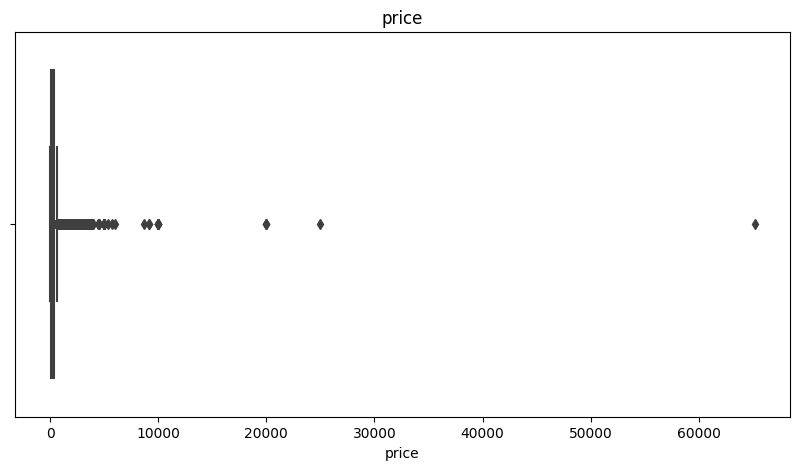

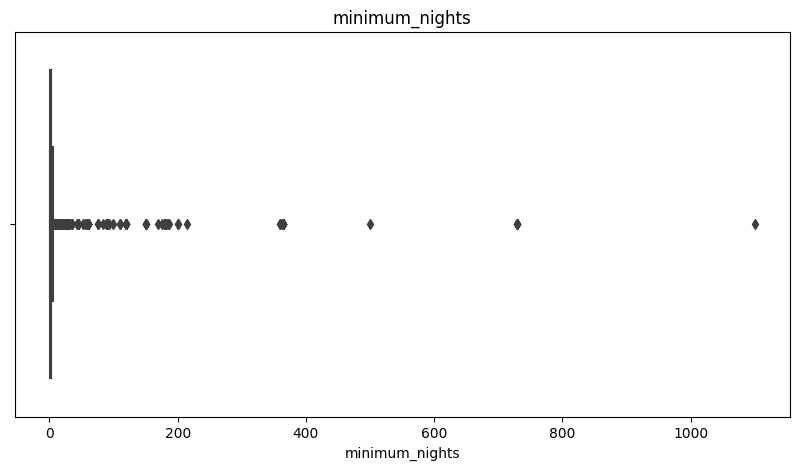

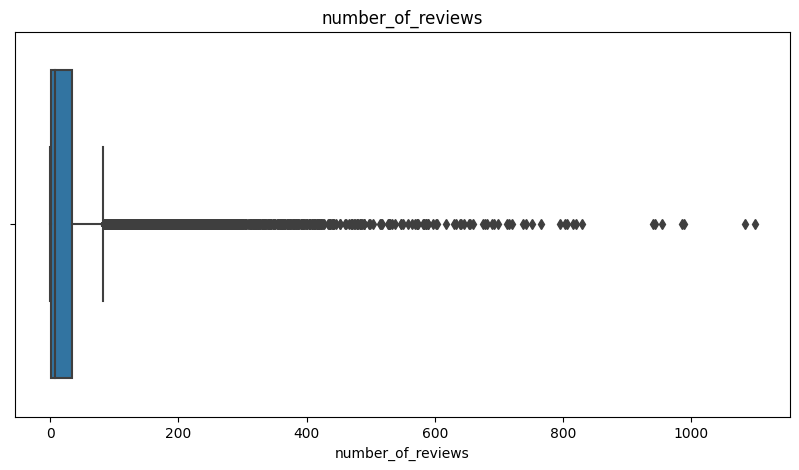

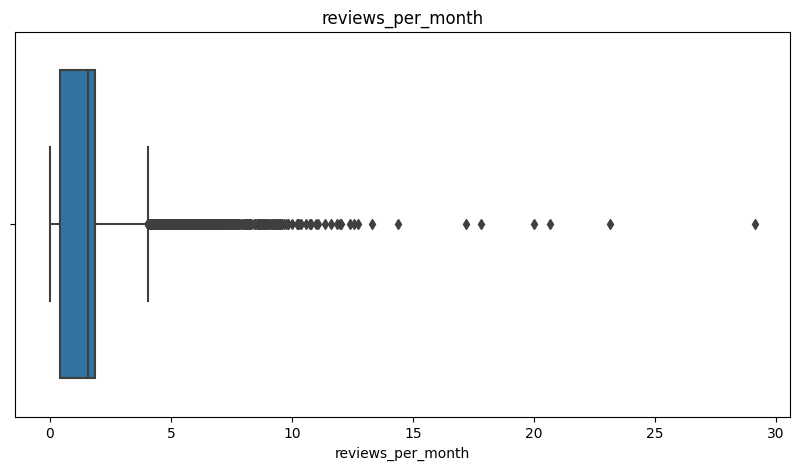

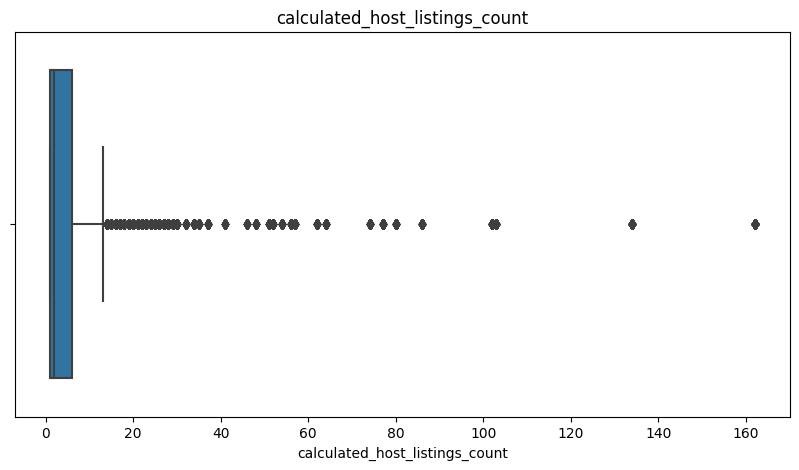

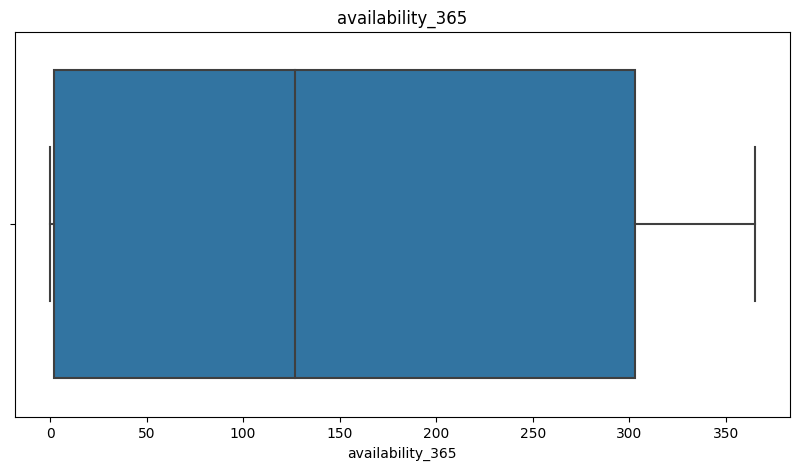

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Визуализация графиков ящика с усами для каждого числового столбца
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=listing[col])
    plt.title(col)
    plt.show()

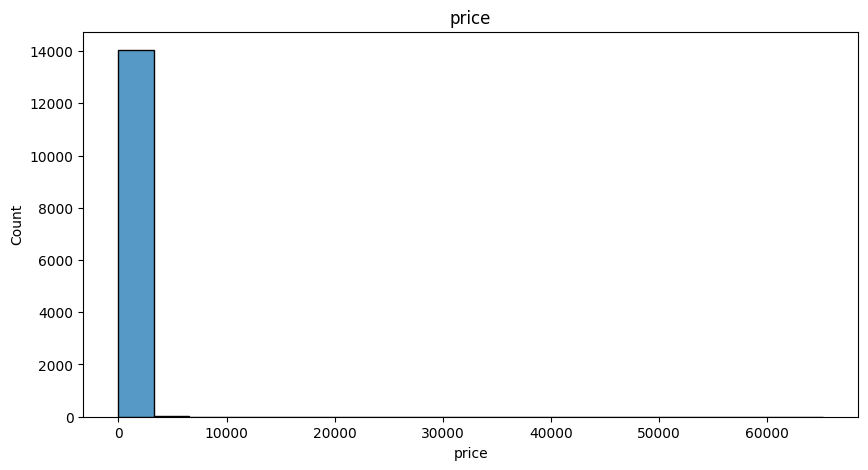

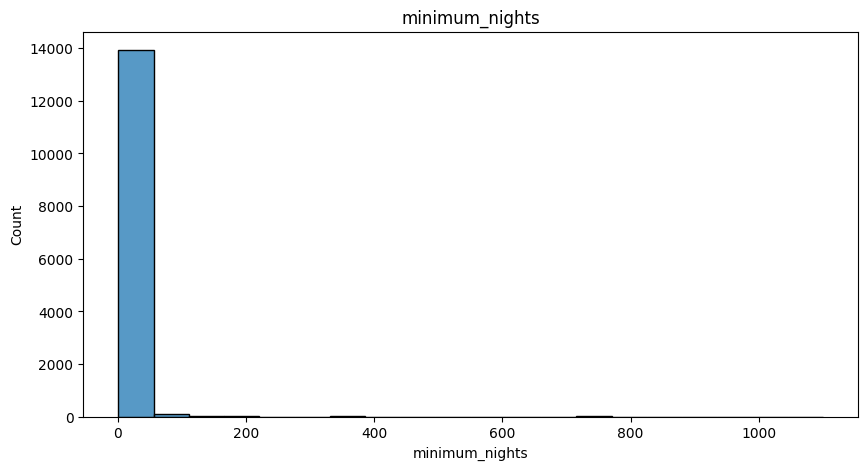

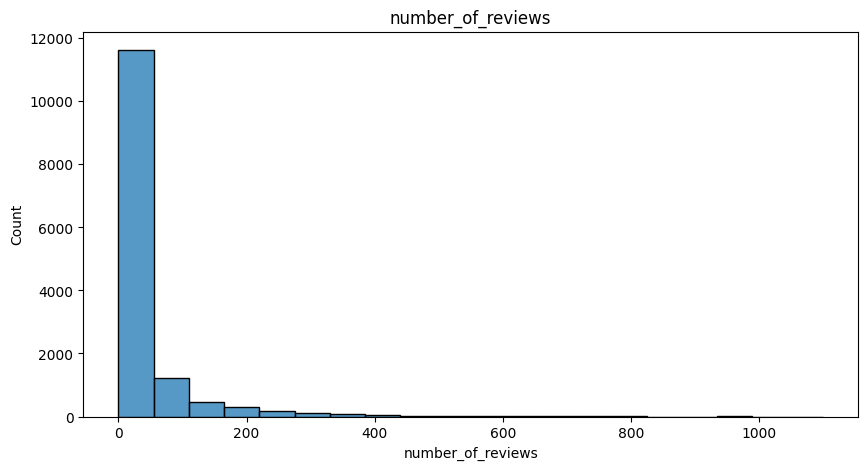

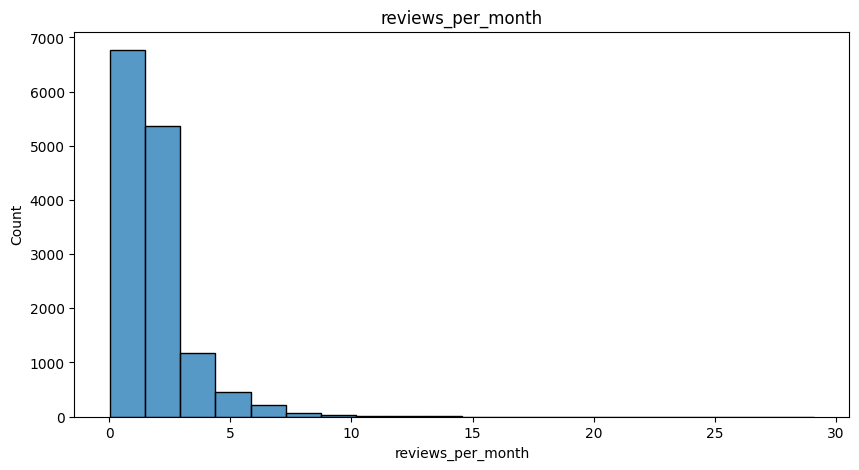

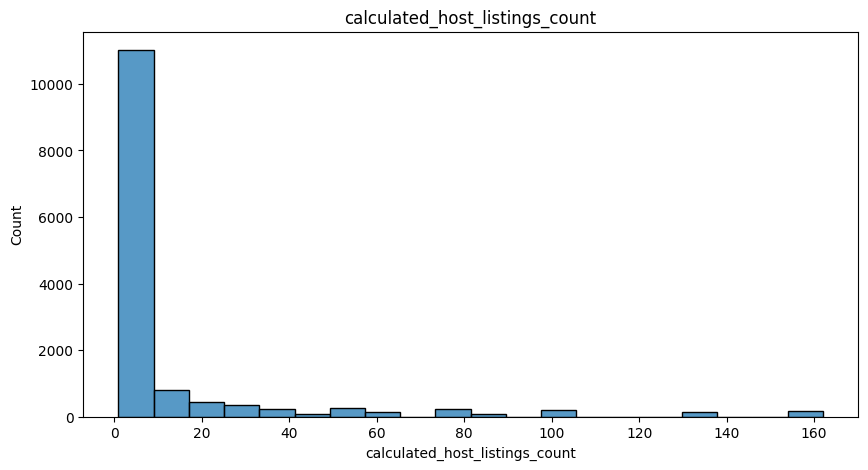

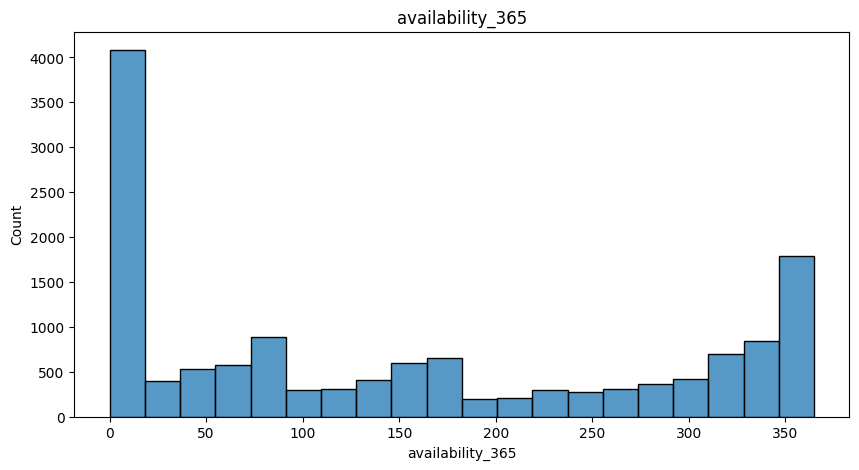

In [35]:
# Визуализация гистограмм для каждого числового столбца
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=listing[col], bins=20)
    plt.title(col)
    plt.show()

из графиков видно, что: 

колонка price распределенна в диапазоне от 0 до 10000, все что больше этого значения давайте удалим

для колонки minimum nights уберем все значения выше 300

колонку number of reviews оставим без изменений

в колонке reviews per month уберем все значения свыше 15

в колонке calculated_host_listings_count уберем все что свыше 90

колонку availability_365 оставим без изменений

In [36]:
listing = listing.loc[listing['price'] <= 10000].reset_index(drop=True)
listing = listing.loc[listing['minimum_nights'] <= 300].reset_index(drop=True)
listing = listing.loc[listing['reviews_per_month'] <= 15].reset_index(drop=True)
listing = listing.loc[listing['calculated_host_listings_count'] <= 90].reset_index(drop=True)

Отлично теперь посмотрим на графики после обработки

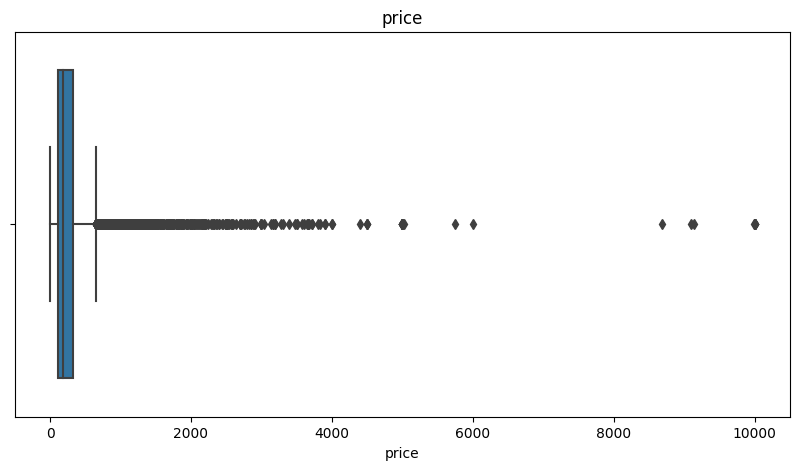

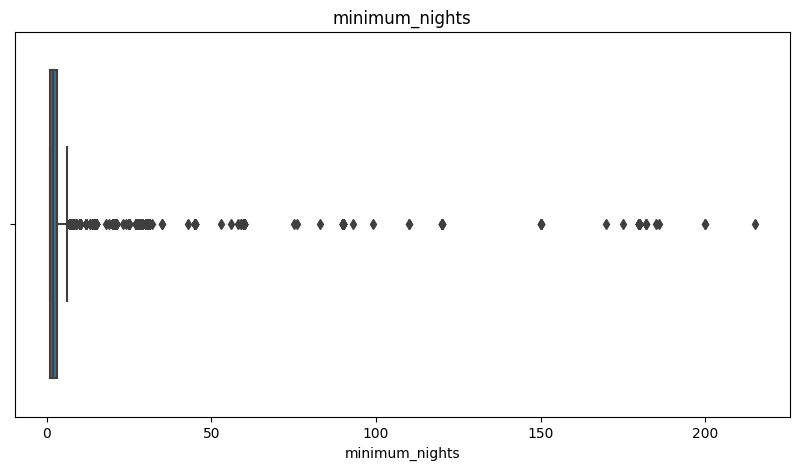

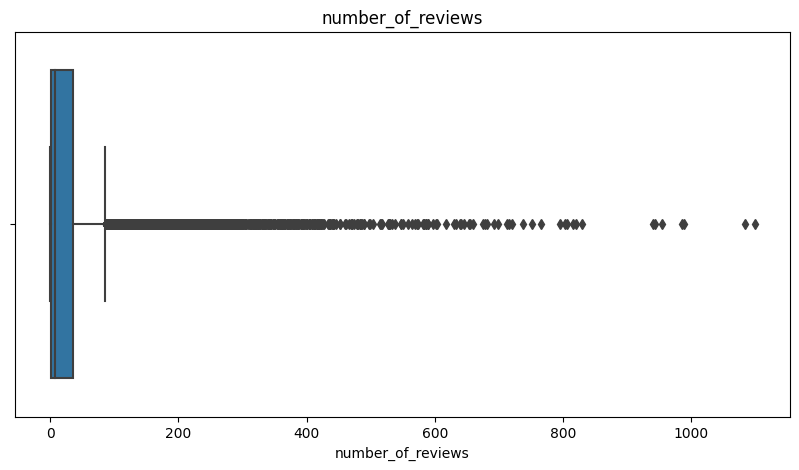

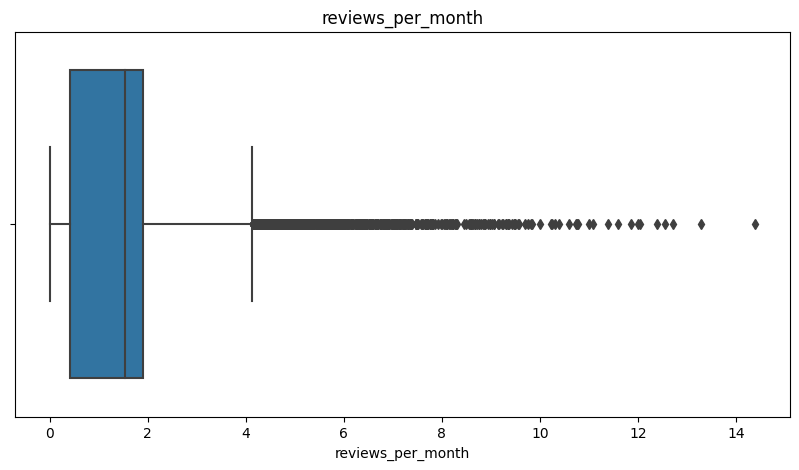

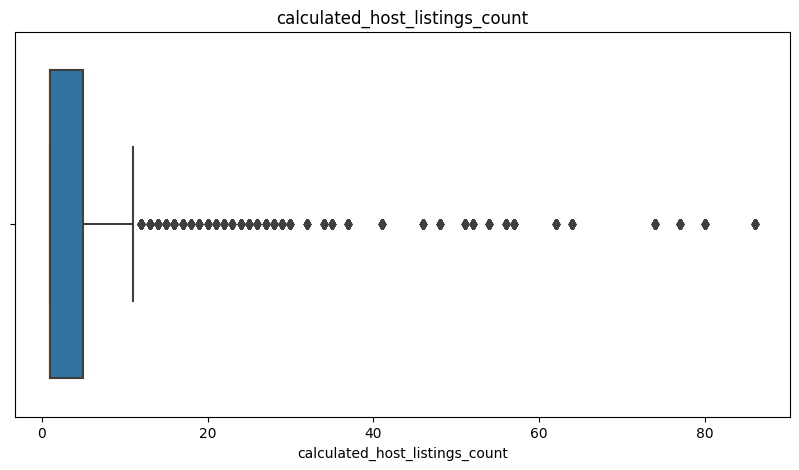

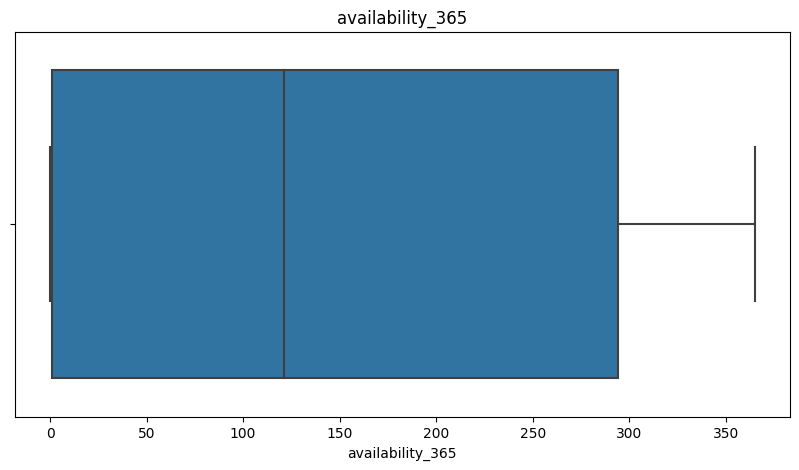

In [37]:
# Визуализация графиков ящика с усами для каждого числового столбца
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x=listing[col])
    plt.title(col)
    plt.show()

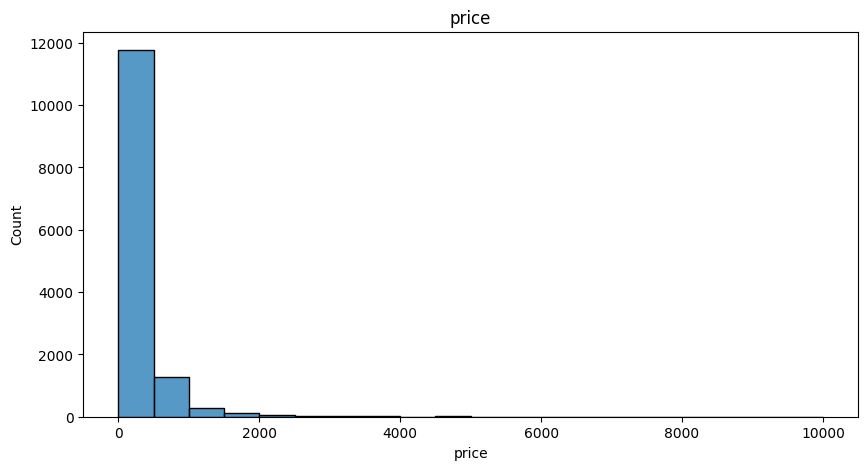

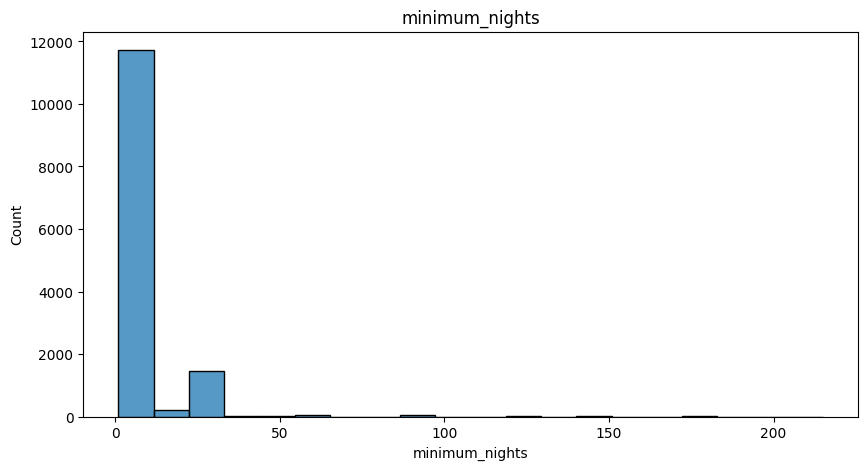

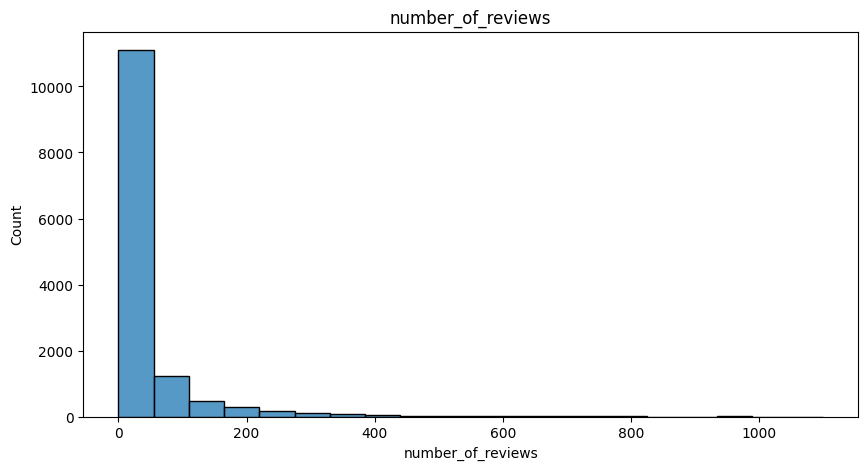

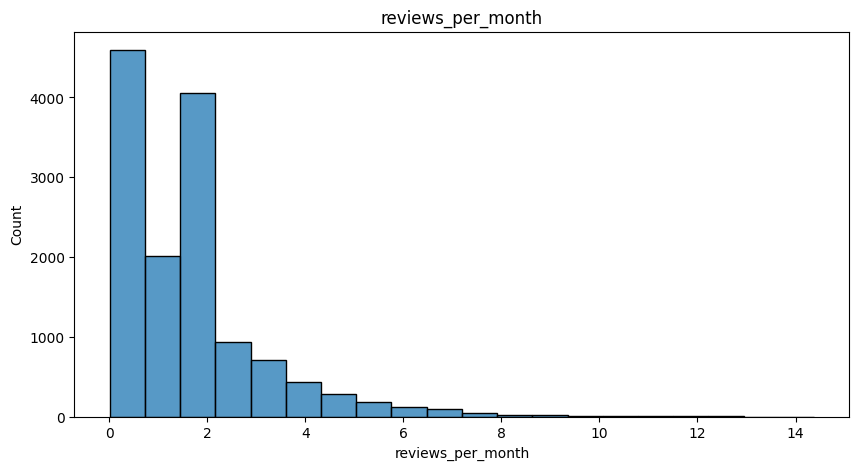

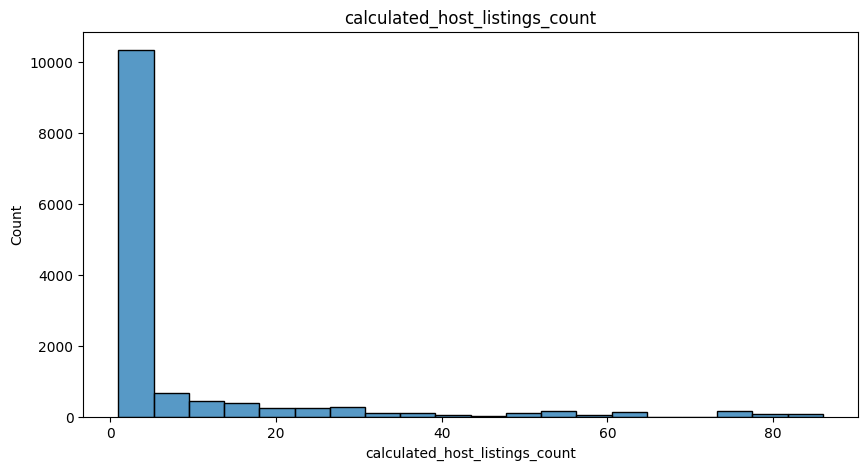

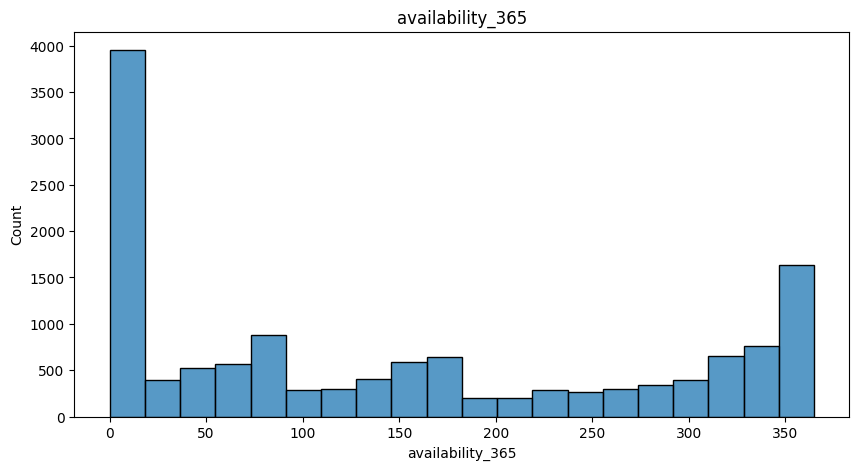

In [38]:
# Визуализация гистограмм для каждого числового столбца
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.histplot(x=listing[col], bins=20)
    plt.title(col)
    plt.show()

в некоторых случаях было принято не удалять прям все большие значения, так как они скорее всего не представляют собой какие-то аномалии и должны присутствовать в данных для разнообразия, а вот аномально большие значения были удалены

**Критерии оценки:**

* Визуализация распределений числовых столбцов для выявления выбросов.
* Принятие обоснованного решения о том, как обработать выбросы и успешное выполнение соответствующих операций.
* Предоставление графиков до и после обработки выбросов для демонстрации успешной обработки.

## Задание 4 (1.75 балл): Создание новых признаков

* Создайте признак 'distance_to_city_center_km', который вычисляет расстояние от каждого объекта размещения до центра города. В качестве координат центра используйте значения с сайта: https://batchgeo.com/map/latitude-longitude

* Создайте новый признак "days_since_last_review" на основе столбца 'last_review'. Это может быть полезно для определения свежести отзывов и активности размещения.

* Создайте новый признак "booking_rate" на основе столбцов 'availability_365' и 'number_of_reviews'. Это может быть полезно для определения популярности размещения.

* Проведите анализ созданных признаков: исследуйте распределения

* Выведите информацию о DataFrame и первые 5 строк, чтобы убедиться, что новые признаки были успешно созданы.

In [39]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

from haversine import haversine

# используем уже написаннаю функцию haversine для расчета расстояния между двумя точками на Земле:
def haversine_array(row):
    # координаты центра города Austin
    city_lat, city_lon = 30.15, -97.45
    return haversine((row['latitude'], row['longitude']),(city_lat, city_lon))


# вычисление расстояния до центра города
listing['distance_to_city_center_km'] = listing.apply(haversine_array, axis=1)

ModuleNotFoundError: No module named 'haversine'

In [ ]:
from datetime import datetime

# Вычисление разницы между сегодняшней датой и датой последнего отзыва
listing['days_since_last_review'] = (datetime.now() - listing['last_review']).dt.days

In [ ]:
# Создание нового признака 'booking_rate'
listing['booking_rate'] = listing['number_of_reviews'] / listing['availability_365']

# Замена значений "inf" и "NaN" на 0
listing['booking_rate'] = listing['booking_rate'].replace([np.inf, -np.inf, np.nan], 0)

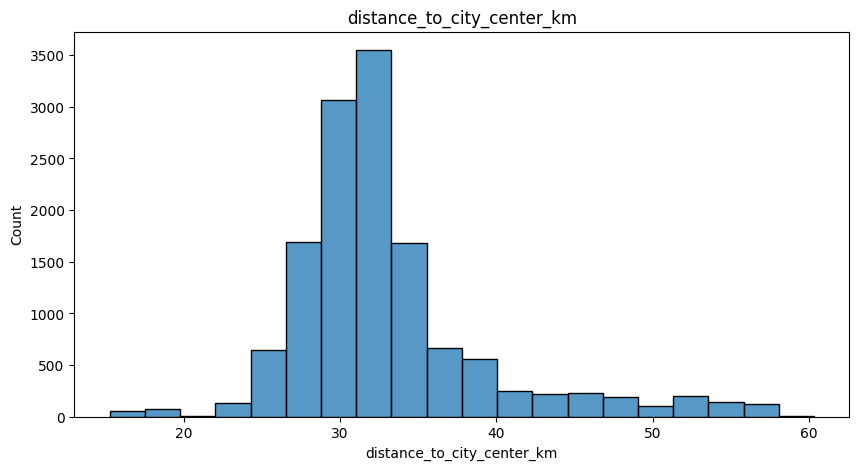

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=listing["distance_to_city_center_km"], bins=20)
plt.title("distance_to_city_center_km")
plt.show()

видим, что у нас распределение расстояния до центра очень близко к нормальному

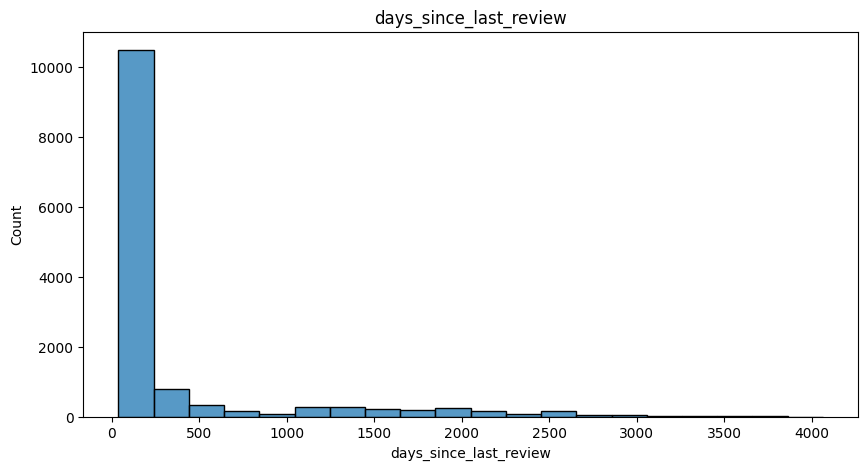

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=listing["days_since_last_review"], bins=20)
plt.title("days_since_last_review")
plt.show()

видим, что у нас присутствует достаточное количество сэмплов у которых количество дней которое прошло с момента последнего отзыва очень большое

однако основаня часть распределена в диапазоне от 100 до 500 дней

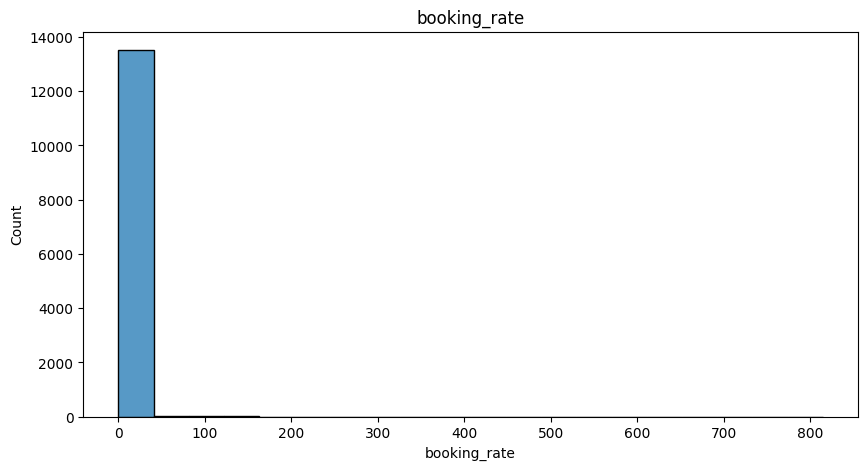

In [ ]:
plt.figure(figsize=(10, 5))
sns.histplot(x=listing["booking_rate"], bins=20)
plt.title("booking_rate")
plt.show()

здесь видим, что данные в основном распределены от 0 до 100

In [ ]:
listing.head()

,id,listing_url,scrape_id,source,name,description,neighborhood_overview,picture_url,host_id,host_url,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_city_center_km,days_since_last_review,booking_rate
0,5456,https://www.airbnb.com/rooms/5456,20230316044216,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,https://www.airbnb.com/users/show/8028,...,4.79,False,2,2,0,0,3.69,29.969278,63,2.114094
1,5769,https://www.airbnb.com/rooms/5769,20230316044216,previous scrape,NW Austin Room,<b>The space</b><br />Looking for a comfortabl...,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,https://www.airbnb.com/users/show/8186,...,4.92,False,1,0,1,0,1.75,46.846451,94,0.000000
2,6413,https://www.airbnb.com/rooms/6413,20230316044216,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,https://www.airbnb.com/users/show/13879,...,4.93,False,1,1,0,0,0.76,29.590362,199,0.000000
3,6448,https://www.airbnb.com/rooms/6448,20230316044216,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/4513152/4ffc1...,14156,https://www.airbnb.com/users/show/14156,...,4.90,True,1,1,0,0,2.10,32.651251,56,2.218045
4,8502,https://www.airbnb.com/rooms/8502,20230316044216,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,,https://a0.muscache.com/pictures/miso/Hosting-...,25298,https://www.airbnb.com/users/show/25298,...,4.57,False,1,1,0,0,0.30,29.129489,537,1.333333


как видим, все признаки успешно добавились

**Критерии оценки:**

* Создание новых признаков на основе существующих данных.
* Анализ распределения новых признаков.
* Предоставление вывода о структуре и типах данных DataFrame после создания новых признаков.

## Задание 5 (1.5 балла): Время статистики!

* Рассчитайте описательные статистики для категориальных переменных. Опишите, какие выводы вы можете сделать из полученных данных.

* Рассчитайте описательные статистики для числовых переменных. Опишите, какие выводы вы можете сделать из полученных данных для хотя бы трех признаков.

* Выберите 3 интересующих вас числовых признака и рассчитайте релевантные описательные статистики для этих признаков, сгруппировав данные по категориальным переменным, таким как 'room_type', 'neighbourhood_group' или 'property_type'. Какие закономерности вы можете отметить? Как их можно проинтерпретировать?

In [ ]:
# Попробуем найти категориальные перменные
cols = list(listing.columns)
categorical = []
for col in cols:
    if len(listing[col].unique()) <= 10:
        categorical.append(col)

In [ ]:
categorical

['scrape_id',
 'source',
 'host_response_time',
 'host_is_superhost',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'room_type',
 'has_availability',
 'calendar_last_scraped',
 'instant_bookable',
 'calculated_host_listings_count_shared_rooms']

In [ ]:
listing[categorical].head()

,scrape_id,source,host_response_time,host_is_superhost,host_verifications,host_has_profile_pic,host_identity_verified,room_type,has_availability,calendar_last_scraped,instant_bookable,calculated_host_listings_count_shared_rooms
0,20230316044216,city scrape,within an hour,True,"['email', 'phone']",True,True,Entire home/apt,True,2023-03-16,False,0
1,20230316044216,previous scrape,within a few hours,True,"['email', 'phone', 'work_email']",True,True,Private room,True,2023-03-16,False,0
2,20230316044216,previous scrape,within an hour,True,"['email', 'phone']",True,True,Entire home/apt,True,2023-03-16,False,0
3,20230316044216,city scrape,within an hour,True,"['email', 'phone']",True,True,Entire home/apt,True,2023-03-16,True,0
4,20230316044216,city scrape,within a day,False,"['email', 'phone']",True,False,Entire home/apt,True,2023-03-17,False,0


In [ ]:
listing[categorical].dtypes

scrape_id                                               int64
source                                                 object
host_response_time                                     object
host_is_superhost                                        bool
host_verifications                                     object
host_has_profile_pic                                     bool
host_identity_verified                                   bool
room_type                                              object
has_availability                                         bool
calendar_last_scraped                          datetime64[ns]
instant_bookable                                         bool
calculated_host_listings_count_shared_rooms             int64
dtype: object

Внимательно изучив описание данных с оф. сайта: можно сделать вывод, что в качестве категориальных признаков мы можем взять следующие признаки:

source, host_response_time, host_is_superhost, host_has_profile_pic, host_identity_verified, room_type, has_availability, instant_bookable

Также сюда добавим признак: property_type

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
categorical = ["source", "host_response_time", "host_is_superhost", "host_has_profile_pic", "host_identity_verified", "room_type", "has_availability", "instant_bookable", "property_type"]
listing[categorical]

,source,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,has_availability,instant_bookable,property_type
0,city scrape,within an hour,True,True,True,Entire home/apt,True,False,Entire guesthouse
1,previous scrape,within a few hours,True,True,True,Private room,True,False,Private room in home
2,previous scrape,within an hour,True,True,True,Entire home/apt,True,False,Entire guesthouse
3,city scrape,within an hour,True,True,True,Entire home/apt,True,True,Entire guesthouse
4,city scrape,within a day,False,True,False,Entire home/apt,True,False,Entire guest suite
...,...,...,...,...,...,...,...,...,...
13555,city scrape,within an hour,False,True,True,Entire home/apt,True,True,Entire rental unit
13556,city scrape,within an hour,False,True,True,Entire home/apt,True,True,Entire rental unit
13557,city scrape,within an hour,False,True,True,Entire home/apt,True,True,Entire rental unit
13558,city scrape,within an hour,False,True,True,Entire home/apt,True,False,Entire home


Выведем описательные статистики:

In [ ]:
listing[categorical].describe()

,source,host_response_time,host_is_superhost,host_has_profile_pic,host_identity_verified,room_type,has_availability,instant_bookable,property_type
count,13560,13560,13560,13560,13560,13560,13560,13560,13560
unique,2,4,2,2,2,4,2,2,68
top,city scrape,within an hour,False,True,True,Entire home/apt,True,False,Entire home
freq,10162,11891,8649,13419,11508,11143,12235,9474,5148


Из полученного выше можно сделать следующие выводы:

- зачастую люди натыкались на объявления с помощью "city scrape", что как пишут в описании датасета означает, что объявление было найдено путем поиска по городу, в то время как "previous scrape" означает, что объявление было замечено в ходе другого поиска, проведенного за последние 65 дней, и было подтверждено, что объявление все еще доступно на сайте Airbnb.

- в целом время ответа от хостинга составляет менее часа

- очень много владельцев помещения не является superhost на сайте airbnb (p.s. чтобы получить это звание владельцу необходимо выполнить ряд каких-то требований от airbnb, я так понимаю, что это очень похоже на галочку в инстаграме)

- почти у всех хостов есть фотография своего профиля 

- почти 85% всех хостов являются подтвержденными личностями

- более 80% всех видов жилья состовляют "Entire home/apt". Как написано в описании: они лучше всего подходят, если вы ищете жилье вдали от дома. Располагая целым помещением, вы будете располагать всем пространством в полном своем распоряжении. Обычно это включает в себя спальню, ванную комнату, кухню и отдельный, выделенный вход. Хозяева должны указать в описании, будут ли они находиться в собственности или нет (например: ""Хозяин занимает первый этаж дома""), и предоставить более подробную информацию в объявлении.

- огромное количество жилья доступно к указанной дате

- почти 70% обьявлений не имеют возможности для гостя автоматически забронировать номер без необходимости принятия хозяином его запроса на бронирование

- признак property_type имеет самое большое количество различных значений(68), однако среди них самым популярным является значение entire home(больше трети от всех значений этого признака), что означает, что зачастую сдают весь дом

Отлично, теперь найдем все числовые колонки:

In [ ]:
numeric_columns = list(listing.select_dtypes(include=['int64', 'float64']).columns)

In [ ]:
listing[numeric_columns]

,id,scrape_id,host_id,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_city_center_km,days_since_last_review,booking_rate
0,5456,20230316044216,8028,2.0,4.0,78702,30.260570,-97.734410,3,1.0,...,4.730000,4.790000,2,2,0,0,3.690000,29.969278,63,2.114094
1,5769,20230316044216,8186,1.0,4.0,78729,30.456970,-97.784220,2,1.0,...,4.760000,4.920000,1,0,1,0,1.750000,46.846451,94,0.000000
2,6413,20230316044216,13879,1.0,1.0,78704,30.248850,-97.735870,2,2.0,...,4.870000,4.930000,1,1,0,0,0.760000,29.590362,199,0.000000
3,6448,20230316044216,14156,1.0,2.0,78704,30.260340,-97.764870,2,1.0,...,4.970000,4.900000,1,1,0,0,2.100000,32.651251,56,2.218045
4,8502,20230316044216,25298,1.0,1.0,78741,30.234660,-97.736820,2,1.0,...,4.640000,4.570000,1,1,0,0,0.300000,29.129489,537,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13555,847159076072987428,20230316044216,276920863,43.0,88.0,78705,30.289220,-97.747269,10,4.0,...,4.824534,4.757155,41,41,0,0,1.558955,32.488126,60,0.000000
13556,847171709264672413,20230316044216,276920863,43.0,88.0,78705,30.290238,-97.748501,2,2.0,...,4.824534,4.757155,41,41,0,0,1.558955,32.646004,60,0.000000
13557,847178203609366885,20230316044216,276920863,43.0,88.0,78705,30.287227,-97.726643,5,2.0,...,4.824534,4.757155,41,41,0,0,1.558955,30.649537,60,0.000000
13558,847256590826352221,20230316044216,499116561,2.0,2.0,78734,30.381710,-97.952860,6,2.0,...,4.824534,4.757155,1,1,0,0,1.558955,54.737013,60,0.000000


Из них исходя из описания приведенного на сайте, мы возьмем следующие колонки все признаки за исключением: id, scrape_id, host_id

In [ ]:
numeric_columns.remove("id")
numeric_columns.remove("scrape_id")
numeric_columns.remove("host_id")

In [ ]:
listing[numeric_columns]

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_city_center_km,days_since_last_review,booking_rate
0,2.0,4.0,78702,30.260570,-97.734410,3,1.0,2.0,176.0,2,...,4.730000,4.790000,2,2,0,0,3.690000,29.969278,63,2.114094
1,1.0,4.0,78729,30.456970,-97.784220,2,1.0,1.0,42.0,1,...,4.760000,4.920000,1,0,1,0,1.750000,46.846451,94,0.000000
2,1.0,1.0,78704,30.248850,-97.735870,2,2.0,1.0,109.0,30,...,4.870000,4.930000,1,1,0,0,0.760000,29.590362,199,0.000000
3,1.0,2.0,78704,30.260340,-97.764870,2,1.0,2.0,240.0,3,...,4.970000,4.900000,1,1,0,0,2.100000,32.651251,56,2.218045
4,1.0,1.0,78741,30.234660,-97.736820,2,1.0,1.0,85.0,4,...,4.640000,4.570000,1,1,0,0,0.300000,29.129489,537,1.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13555,43.0,88.0,78705,30.289220,-97.747269,10,4.0,5.0,129.0,2,...,4.824534,4.757155,41,41,0,0,1.558955,32.488126,60,0.000000
13556,43.0,88.0,78705,30.290238,-97.748501,2,2.0,1.0,54.0,2,...,4.824534,4.757155,41,41,0,0,1.558955,32.646004,60,0.000000
13557,43.0,88.0,78705,30.287227,-97.726643,5,2.0,3.0,145.0,2,...,4.824534,4.757155,41,41,0,0,1.558955,30.649537,60,0.000000
13558,2.0,2.0,78734,30.381710,-97.952860,6,2.0,4.0,144.0,2,...,4.824534,4.757155,1,1,0,0,1.558955,54.737013,60,0.000000


In [ ]:
listing[numeric_columns].describe()

,host_listings_count,host_total_listings_count,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,beds,price,minimum_nights,...,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_city_center_km,days_since_last_review,booking_rate
count,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,...,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000,13560.000000
mean,33.263643,55.240560,78724.518142,30.280201,-97.750411,4.843068,2.075442,2.648304,300.357596,6.413938,...,4.828510,4.765482,8.063864,6.679130,1.093805,0.289159,1.559035,33.006202,341.360177,0.901514
std,174.571095,338.256652,20.647262,0.063994,0.063094,3.173500,1.266875,2.543924,449.883483,14.755278,...,0.281954,0.330155,16.119709,14.549475,5.656546,3.583970,1.524532,6.390057,612.028586,12.353998
min,1.000000,1.000000,78701.000000,30.078870,-98.056630,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000,15.256513,39.000000,0.000000
25%,1.000000,1.000000,78704.000000,30.241160,-97.770013,2.000000,1.000000,1.000000,109.000000,1.000000,...,4.824534,4.750000,1.000000,1.000000,0.000000,0.000000,0.410000,29.374030,60.000000,0.000000
50%,2.000000,3.000000,78723.000000,30.268675,-97.741701,4.000000,2.000000,2.000000,182.000000,2.000000,...,4.860000,4.800000,1.000000,1.000000,0.000000,0.000000,1.530000,31.733047,69.000000,0.024926
75%,7.000000,10.000000,78745.000000,30.308480,-97.717110,6.000000,3.000000,3.000000,325.000000,3.000000,...,5.000000,4.940000,5.000000,3.000000,0.000000,0.000000,1.900000,34.125223,198.000000,0.221578
max,2504.000000,7794.000000,78759.000000,30.512250,-97.560620,16.000000,23.000000,132.000000,10000.000000,215.000000,...,5.000000,5.000000,86.000000,86.000000,56.000000,47.000000,14.380000,60.324288,4064.000000,815.000000


In [ ]:
listing[["accommodates", "price", "distance_to_city_center_km"]].describe()

,accommodates,price,distance_to_city_center_km
count,13560.000000,13560.000000,13560.000000
mean,4.843068,300.357596,33.006202
std,3.173500,449.883483,6.390057
min,1.000000,1.000000,15.256513
25%,2.000000,109.000000,29.374030
50%,4.000000,182.000000,31.733047
75%,6.000000,325.000000,34.125223
max,16.000000,10000.000000,60.324288


Так как признаков очень много и разрешили сделать выводы для трех, то так и сделаем:

- судя по описанию признака accommodates и его распределению, можно сделать вывод, что в среднем апартаменты довольно таки вместительные (как минимум 4 человека смогут комфортно расположиться). Также интересным является тот факт, что присутствуют объявления с жильем в котором можно комфортно разместить 16 человек

- исходя из описательных статистик для цены, можно сделать, что в среднем цена на квартиру составляет 300$ 

- в среднем расстояние от апартаментов до центра города состовляет чуть больше 30 км, что на мой взгляд является довольно большим значением для такого города как Остин. Остин между прочим почти в 4 раза меньше Москвы по площади, однако большиснтво апартаментов имеют расстояние от 25 до 38 км до центра, в то время как в Москве расстояние от Одинцово до центра состовляет 27 км. 

Далее используем те же 3 числовых признака для оценки сгруппированных по категориальными признакам('room_type', 'neighbourhood_group' или 'property_type') данных

P.S. в задании предложили использовать ('room_type', 'neighbourhood_group' или 'property_type'), однако хочу заметить, что признака "neighbourhood_group" в данном листинге нет. Поэтому будем отталкиваться от двух оставишихся категориальных признаков.

In [ ]:
categorical_columns = ['room_type','property_type']
listing[categorical_columns]

,room_type,property_type
0,Entire home/apt,Entire guesthouse
1,Private room,Private room in home
2,Entire home/apt,Entire guesthouse
3,Entire home/apt,Entire guesthouse
4,Entire home/apt,Entire guest suite
...,...,...
13555,Entire home/apt,Entire rental unit
13556,Entire home/apt,Entire rental unit
13557,Entire home/apt,Entire rental unit
13558,Entire home/apt,Entire home


Сделаем группировку по признаку room_type:

In [ ]:
# выберем нужные нам колонки:
columns_room_type = ['room_type', 'price', 'accommodates', 'distance_to_city_center_km']
df_room_type = listing[columns_room_type].copy()

In [ ]:
# сгруппируем данные по колонке room_type:

grouped_room_type = df_room_type.groupby('room_type').agg(['mean', 'std', 'min', 'max'])
grouped_room_type

price                             accommodates  \
                       mean         std    min      max         mean   
room_type                                                              
Entire home/apt  335.351162  450.626510    1.0  10000.0     5.422328   
Hotel room       331.333333  232.895542  175.0    599.0     3.000000   
Private room     142.078355  417.988260    5.0  10000.0     2.194805   
Shared room       65.730769   96.859946   15.0    700.0     1.653846   

                                  distance_to_city_center_km            \
                      std min max                       mean       std   
room_type                                                                
Entire home/apt  3.170732   1  16                  33.088303  6.421990   
Hotel room       1.732051   1   4                  31.160155  0.277629   
Private room     1.208878   1  16                  32.658131  6.331539   
Shared room      1.204919   1   8                  31.993910  3.265745   

                                       
                       min        max  
room_type                              
Entire home/apt  15.256513  60.324288  
Hotel room       30.840082  31.335774  
Private room     15.536882  57.311242  
Shared room      18.205400  48.110374

Выводы для price:

- средняя цена за апартаменты или номер в отеле почти одинаковые, однако цена за комнату более чем в два раза меньше, а средняя цена за поделенную с кем-то комнату меньше в 4 раза

- интересно, что по статистике были случаи когда цена за апартаменты доходила до 1$, и в тоже время она и поднималась до ценника в 10000$, также интересно, что цена за просто комнату собственную тоже доходила до 10000$. Максимальная цена за разделенную с кем-то комнату достигала 700$, в то время как цена на номер в отеле достигала максимум 599$.

Выводы для accommodates:

- В среднем апартаменты могут вместить до 5 человек, номер в отеле способен комфортно разметить 3 человек.

- Интересно, что также были случаи когда сдавались апартаменты вместимостью до 16 человек, мало того сдавалась даже частная комната способная вместить в себя 16 человек

Выводы для distance_to_city_center_km:

- Как уже обсуждалось выше, в среднем расстояние от всех мест состовляет 30 км, что на мой взгляд является довольно таки большим расстоянием

- Видим, что самымми далекими по расположению относительно центра являются номера в отелях. Мин. значение 30.84, а макс. - 31.33

- Самымми близкими к центру оказались апартаменты и частные комнаты, однако и там есть случаи когда расстояние до центра состовляет почти 60км

Сделаем группировку по признаку property_type:

In [ ]:
# выберем нужные нам колонки:
columns_property_type = ['property_type', 'price', 'accommodates', 'distance_to_city_center_km']
df_property_type = listing[columns_property_type].copy()

In [ ]:
# сгруппируем данные по колонке property_type:

grouped_property_type = df_property_type.groupby('property_type').agg(['mean', 'std', 'min', 'max'])
grouped_property_type

price                            accommodates            \
                     mean         std    min     max         mean       std   
property_type                                                                 
Barn           161.500000   31.819805  139.0   184.0     3.500000  2.121320   
Boat           246.875000  213.009348   98.0   720.0     6.000000  4.375255   
Bus            115.400000   38.782012   68.0   182.0     3.900000  1.663330   
Camper/RV      147.518519  199.540289   11.0  1500.0     2.805556  1.758601   
Campsite        44.500000   44.982536   20.0   141.0    10.625000  7.424621   
...                   ...         ...    ...     ...          ...       ...   
Tiny home      139.528846   70.521491   49.0   600.0     2.846154  1.466581   
Tipi           190.000000         NaN  190.0   190.0     2.000000       NaN   
Tower          315.500000   96.735033  188.0   413.0     5.750000  2.629956   
Treehouse      168.857143   67.060740   85.0   263.0     3.714286  1.380131   
Yurt           155.250000   75.345316   84.0   248.0     2.750000  0.957427   

                      distance_to_city_center_km                        \
              min max                       mean        std        min   
property_type                                                            
Barn            2   5                  49.873830   7.971097  44.237414   
Boat            2  16                  49.062906  12.725652  28.564997   
Bus             2   6                  31.307409   8.959453  22.504239   
Camper/RV       1  16                  34.064420   9.168422  21.080559   
Campsite        1  16                  33.155471   4.628226  28.761905   
...            ..  ..                        ...        ...        ...   
Tiny home       1   8                  32.269263   9.245443  22.068324   
Tipi            2   2                  43.355522        NaN  43.355522   
Tower           2   8                  32.280908   4.321904  30.075019   
Treehouse       2   6                  41.330475  14.995102  27.307108   
Yurt            2   4                  40.161267  12.358180  28.440665   

                          
                     max  
property_type             
Barn           55.510247  
Boat           56.961888  
Bus            42.967054  
Camper/RV      56.030904  
Campsite       43.710280  
...                  ...  
Tiny home      57.650664  
Tipi           43.355522  
Tower          38.763464  
Treehouse      57.323054  
Yurt           53.475379  

[68 rows x 12 columns]

In [ ]:
# Выведем так чтобы было видно все 68 статистик для каждого из значений
print(grouped_property_type.to_string())

                                          price                              accommodates                   distance_to_city_center_km                                 
                                           mean          std    min      max         mean       std min max                       mean        std        min        max
property_type                                                                                                                                                          
Barn                                 161.500000    31.819805  139.0    184.0     3.500000  2.121320   2   5                  49.873830   7.971097  44.237414  55.510247
Boat                                 246.875000   213.009348   98.0    720.0     6.000000  4.375255   2  16                  49.062906  12.725652  28.564997  56.961888
Bus                                  115.400000    38.782012   68.0    182.0     3.900000  1.663330   2   6                  31.307409   8.959453  22.504239  42

Я сделаю выводы не по всем 68 значениям для каждого из числовых признаков, а по самым интересным, на мой взгляд, вариантам.

Выводы по price:

- В среднем цена за весь дом состовялет 453,5$, однако были случаи когда весь дом сдавали за 1$... Максимальная цена достигала 10000$

- Также интересно, что были случаи когда сдавали целый автобус, место для кэмпинга, домик на дереве, башню, лодку и даже купольное здание. Самым дорогим было как раз последнее, в среднем цена за такое архитектурное сооружение обходилось арендателям в 657$. 

Выводы по accommodates:

- Самыми вместительными по количеству людей являются вилла, место для кэмпинга, комната в апартаментах-отеле. В среднем в этих местах комфортно могут разместиться до 10 человек. 

- Интересно, что также были случаи когда сдавали целый шатер, способный вместить в себя до 16 человек.  Причем цена за такой шатер составляла 1000$

- В среднем объявления, со сдачей целого дома, заявляют, что вместимость достигает 7 человек.

Выводы по distance_to_city_center_km:

- В среднем все дома которые сдаются целиком, расположенны на расстоянии 30км от центра города

**Критерии оценки:**

* Расчет описательных статистик для категориальных и числовых переменных и предоставление результатов.
* Описание выводов, которые можно сделать на основе описательных статистик.
* Выбор 3 числовых признаков и группировка данных по категориальным переменным для расчета описательных статистик. Описание закономерностей и их интерпретация.

## Задание 6 (1 балл): Корреляции

* Найдите три самых сильных линейных взаимосвязи.

* Опишите, между какими признаками вы их нашли и содержательно проинтерпретируйте, почему (с вашей точки зрения) эти показатели связаны.

*важно: необходимо вывести именно с помощью кода 3 пары самых сильно скоррелированных признака, а не искать их глазами в матрице корреляций*


предлагаю рассмотреть весь датасет, за исключением трех первых колонок указываюзих на id, scrape_id, host_id

In [ ]:
df = listing.drop(["id", "scrape_id", "host_id"], axis=1)

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
corr_matrix = df.corr().abs() # так как мы смотрим на линейную корреляцию, то нас интересует только сила корреляции без ее направления, поэтому мы добавляем модуль
corr_matrix

/var/folders/0x/rtgrxqs971v8y8s_v53d6h500000gn/T/ipykernel_58706/2145749007.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr().abs() # так как мы смотрим на линейную корреляцию, то нас интересует только сила корреляции без ее направления, поэтому мы добавляем модуль


,host_is_superhost,host_listings_count,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood_cleansed,latitude,longitude,accommodates,bedrooms,...,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,distance_to_city_center_km,days_since_last_review,booking_rate
host_is_superhost,1.000000,0.037618,0.055531,0.066653,0.069434,0.029374,0.033311,0.004971,0.116367,0.084602,...,0.155246,0.052897,0.042499,0.005060,0.096074,0.059685,0.307042,0.010943,0.271763,0.037343
host_listings_count,0.037618,1.000000,0.893217,0.018263,0.018032,0.081082,0.008707,0.006419,0.032797,0.002392,...,0.042912,0.050421,0.241689,0.256790,0.015641,0.019964,0.019838,0.000856,0.061699,0.011231
host_total_listings_count,0.055531,0.893217,1.000000,0.015952,0.021950,0.046235,0.015052,0.003502,0.042212,0.014110,...,0.040813,0.084027,0.215024,0.224129,0.024466,0.018688,0.021689,0.002091,0.052436,0.009670
host_has_profile_pic,0.066653,0.018263,0.015952,1.000000,0.052060,0.037569,0.043864,0.005389,0.010509,0.013565,...,0.016256,0.000813,0.039148,0.039963,0.003885,0.007662,0.007416,0.022787,0.032351,0.006654
host_identity_verified,0.069434,0.018032,0.021950,0.052060,1.000000,0.019124,0.020160,0.035870,0.007715,0.001431,...,0.007990,0.005079,0.070242,0.090036,0.052626,0.033267,0.057690,0.043605,0.033681,0.011096
neighbourhood_cleansed,0.029374,0.081082,0.046235,0.037569,0.019124,1.000000,0.209597,0.086716,0.032448,0.013827,...,0.018712,0.045058,0.016492,0.061490,0.046676,0.101829,0.049007,0.261967,0.031453,0.012758
latitude,0.033311,0.008707,0.015052,0.043864,0.020160,0.209597,1.000000,0.065062,0.006192,0.021810,...,0.032056,0.028348,0.019000,0.004830,0.012223,0.046401,0.035540,0.482061,0.019116,0.008875
longitude,0.004971,0.006419,0.003502,0.005389,0.035870,0.086716,0.065062,1.000000,0.133114,0.115939,...,0.006212,0.010428,0.004696,0.019637,0.044454,0.031321,0.038084,0.827797,0.011629,0.013696
accommodates,0.116367,0.032797,0.042212,0.010509,0.007715,0.032448,0.006192,0.133114,1.000000,0.833518,...,0.016530,0.140863,0.074414,0.153282,0.127090,0.086720,0.035525,0.112179,0.107363,0.021906
bedrooms,0.084602,0.002392,0.014110,0.013565,0.001431,0.013827,0.021810,0.115939,0.833518,1.000000,...,0.001153,0.092965,0.045442,0.090056,0.059125,0.067553,0.036183,0.112219,0.103512,0.028264


Выведем теперь 3 наиболее линейно коррелируемые пары признаков

In [ ]:
stacked_corr = corr_matrix.unstack().sort_values(ascending=False)
top_corr_pairs = stacked_corr[stacked_corr != 1.0].drop_duplicates()[:3]
print(top_corr_pairs)

minimum_nights_avg_ntm  minimum_nights            0.977205
availability_90         availability_60           0.973083
maximum_nights_avg_ntm  minimum_maximum_nights    0.957851
dtype: float64


Видим, что нас топ 3 выглядит следующим образом:

- minimum_nights_avg_ntm и minimum_nights

- availability_90    и     availability_60

- maximum_nights_avg_ntm и  minimum_maximum_nights

Догадка почему это так:

Исходя из описания датасета:

1) minimum_nights_avg_ntm - the average minimum_night value from the calendar (looking 365 nights in the future)

minimum_nights - minimum number of night stay for the listing (calendar rules may be different)

Также среднее значение вычисляется на основании minimum_nights, исходя из всего этого можно понять почему такая сильная корреляция между признаками

2) availability_x. The availability of the listing x days in the future as determined by the calendar. Note a listing may not be available because it has been booked by a guest or blocked by the host.

Тогда значит, что availability_90 - это доступность на следующие 90 дней, а availability_60 - это доступность на следующие 60 дней. Данные показатели на мой взгляд связаны так как очень редко когда бронируется дилье дольше чем на 60 дней, отсюда и сильная корреляция этих двух признаков

3) maximum_nights_avg_ntm - the average maximum_night value from the calender (looking 365 nights in the future)

minimum_maximum_nights - the smallest maximum_night value from the calender (looking 365 nights in the future)

Здесь схожая концепция как и в первой корреляции, однако тут уже рассматривается не минимальное количество ночей, а минимальное среди максимальных, на мой взгляд это можно обьяснить тем, что опять же люди не так часто берут на продолжительное время жилье, и отсюда разница между значениями минимального и максимального количества дней проживания не совсем большое, а если взять минимальное по всем максимальным значениям, так оно не сильно отличается от минимального значения в совокупности.

**Критерии оценки:**

* Расчет матрицы корреляций для числовых признаков и предоставление результатов.
*Отбор и вывод трех пар самых сильно скоррелированных признаков с использованием кода.
* Содержательная интерпретация найденных взаимосвязей между признаками.

## Задание 7 (2 балла): Визуализации

* Придумайте и постройте как минимум 6 содержательных визуализаций, которые будут иллюстрировать те или иные выводы, которые вы сделали на основе данных. 

* К каждой визуализации должна прилагаться содержательная текстовая интерпретация. 

* Каждая визуализация должна быть грамотно оформлена, с соблюдением всем правил (названия, подписи осей, легенды и т. д.). Необходимо задействовать не менее 4 типов диаграмм.

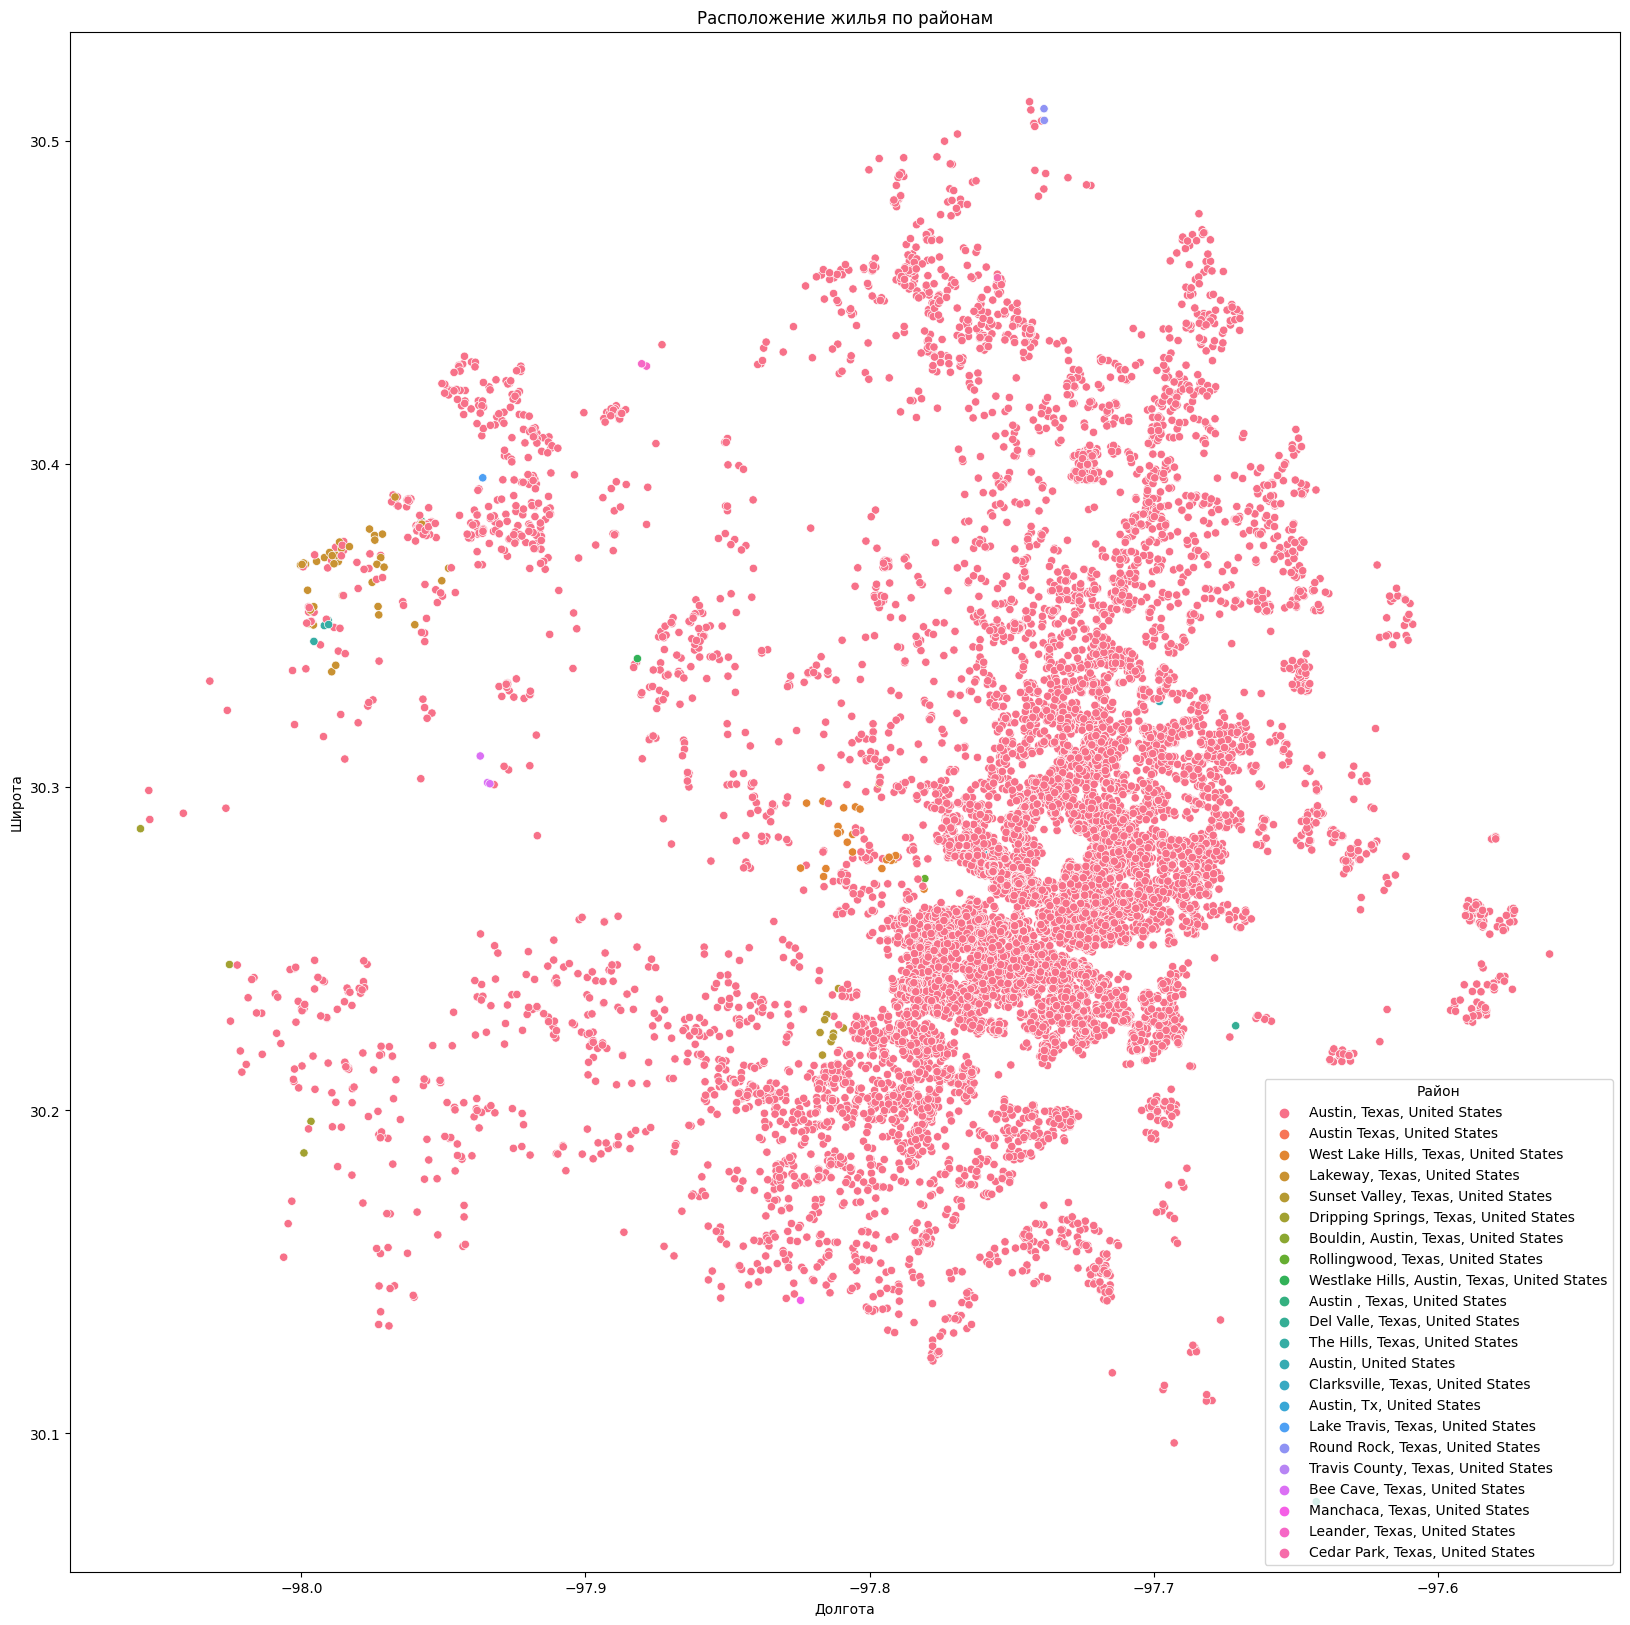

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ
plt.figure(figsize=(20,20))
sns.scatterplot(x=listing["longitude"],y=listing["latitude"],hue=listing["neighbourhood"])
plt.title("Расположение жилья по районам")
plt.legend(title="Район")
plt.ylabel('Широта')
plt.xlabel('Долгота')
plt.show()

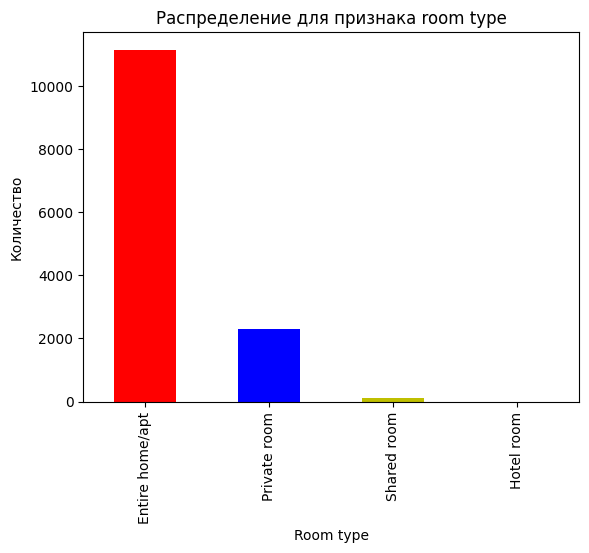

In [ ]:
listing['room_type'].value_counts().plot(kind='bar',color=['r','b','y'])
plt.title("Распределение для признака room type")
plt.ylabel('Количество')
plt.xlabel('Room type')
plt.show()

/var/folders/0x/rtgrxqs971v8y8s_v53d6h500000gn/T/ipykernel_58706/1123757005.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Средняя цена за ночь"}).head(10)


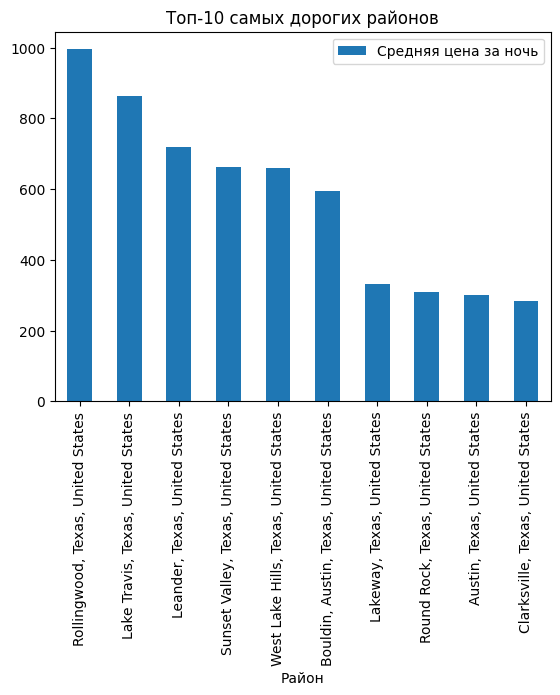

,Средняя цена за ночь
neighbourhood,
"Rollingwood, Texas, United States",995.000000
"Lake Travis, Texas, United States",864.000000
"Leander, Texas, United States",720.000000
"Sunset Valley, Texas, United States",662.666667
"West Lake Hills, Texas, United States",659.391304
"Bouldin, Austin, Texas, United States",595.000000
"Lakeway, Texas, United States",330.642857
"Round Rock, Texas, United States",310.000000
"Austin, Texas, United States",299.411459


In [ ]:
df1 = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Средняя цена за ночь"}).head(10)
df1.plot(kind='bar')
plt.title("Топ-10 самых дорогих районов")
plt.xlabel('Район')
plt.show()
pd.DataFrame(df1)

/var/folders/0x/rtgrxqs971v8y8s_v53d6h500000gn/T/ipykernel_58706/2470577983.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df1 = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Средняя цена за ночь"}).tail(10)


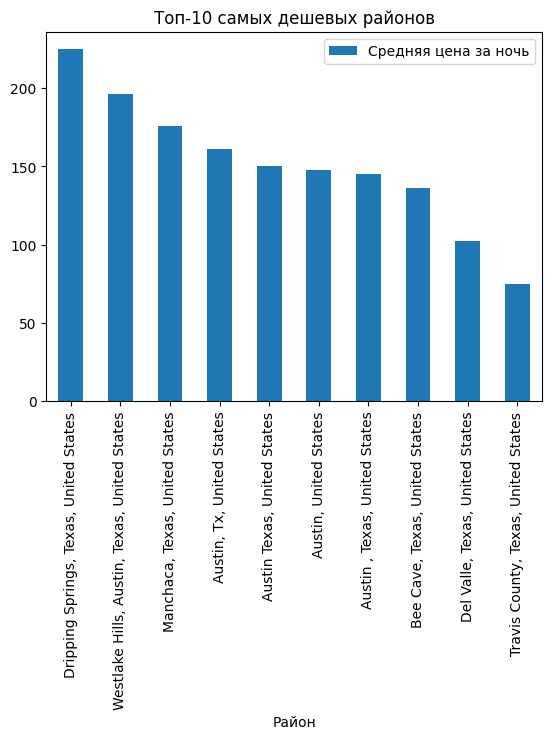

,Средняя цена за ночь
neighbourhood,
"Dripping Springs, Texas, United States",224.75
"Westlake Hills, Austin, Texas, United States",196.00
"Manchaca, Texas, United States",176.00
"Austin, Tx, United States",161.00
"Austin Texas, United States",150.00
"Austin, United States",148.00
"Austin , Texas, United States",145.00
"Bee Cave, Texas, United States",136.00
"Del Valle, Texas, United States",102.50


In [ ]:
df1 = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price"]].agg("mean").sort_values(by="price",ascending=False).rename(index=str, columns={"price": "Средняя цена за ночь"}).tail(10)
df1.plot(kind='bar')
plt.title("Топ-10 самых дешевых районов")
plt.xlabel('Район')
plt.show()
pd.DataFrame(df1)

Text(0.5, 0, 'Имя арендодателя')

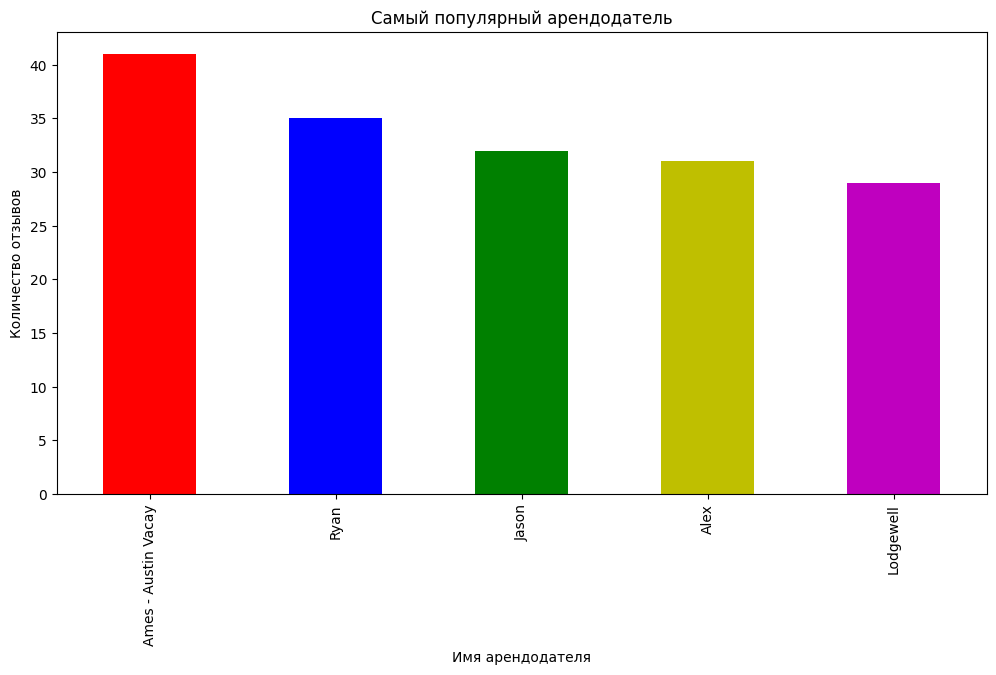

In [ ]:
plt.figure(figsize=(12,6))
listing[listing['number_of_reviews']>=50]['host_name'].value_counts()[:5].plot(kind='bar',color=['r','b','g','y','m'])
plt.title('Самый популярный арендодатель')
plt.ylabel('Количество отзывов')
plt.xlabel('Имя арендодателя')

Видим, что Ames-Austin Vacay самый популярный среди всех арендодателей, судя по количеству отзывов на него

Text(0.5, 1.0, 'Распределение признака room_type')

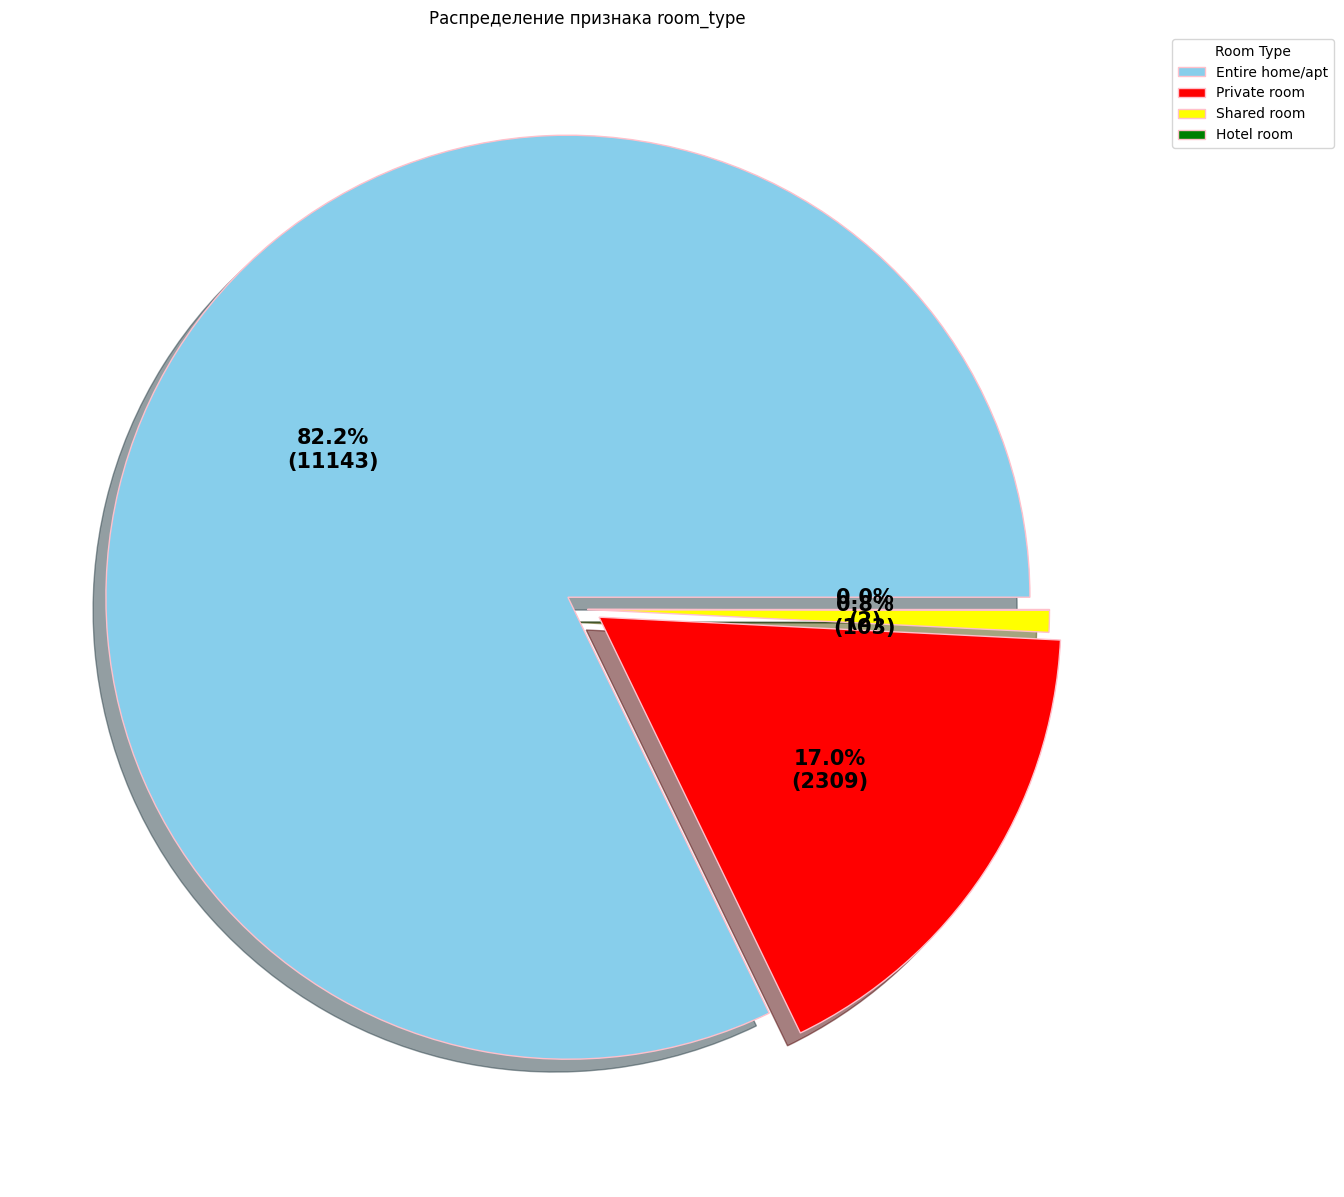

In [ ]:
listing_room_type_frequency = dict(listing["room_type"].value_counts())


room_type = list(listing_room_type_frequency.keys())
data = list(listing_room_type_frequency.values())
colors = ( "skyblue", "red", "yellow", "green")
explode = (0.05, 0.03, 0.0, 0.0)
wp = { 'linewidth' : 1, 'edgecolor' : "pink" }

def func(pct, values):
    absolute = int(pct / 100.*np.sum(values))
    return "{:.1f}%\n({:d})".format(pct, absolute)


fig, listing_pie_chart = plt.subplots(figsize =(20, 15))
wedges, texts, auto_texts = listing_pie_chart.pie(data, autopct = lambda pct: func(pct, data),                                              
                                                explode = explode,
                                                shadow = True,
                                                colors = colors,
                                                startangle = 0,
                                                wedgeprops = wp,
                                                textprops = dict(color ="black"))

# Adding legend
listing_pie_chart.legend(wedges, room_type,
                        title ="Room Type",
                        loc ="upper left",          
                        bbox_to_anchor=(1, 0., 0.,1))

plt.setp(auto_texts, size = 15, weight = "bold")
listing_pie_chart.set_title("Распределение признака room_type")


In [ ]:
listing_room_type_frequency

{'Entire home/apt': 11143,
 'Private room': 2310,
 'Shared room': 104,
 'Hotel room': 3}

Из-за довольно таки маленького количества Hotel room  и shared room относительно остальных типов, у меня пай чарт немного поехал((

**Критерии оценки:**

* Создание 6 содержательных визуализаций с использованием не менее 4 разных типов диаграмм.
* Грамотное оформление визуализаций, с соблюдением всех правил.
* Содержательная текстовая интерпретация для каждой визуализации, объясняющая выводы на основе графика.

## Задание 8 (1 балл): Немного исследований

* Исследуйте данные, используя различные методы анализа и визуализации, чтобы найти какую-нибудь интересную особенность. Это может быть связь между двумя переменными, неожиданный паттерн или что-то еще.

* Проанализируйте и визуализируйте найденную особенность. Используйте различные методы визуализации, если это необходимо.

* Предложите объяснение, почему такая особенность существует. Это может быть ваше предположение или результат анализа.

**Пример:**

Предположим, мы обнаружили интересный факт: районы с высоким средним уровнем цен на жилье имеют более низкий процент доступных объектов на протяжении всего года.

Далеко не будем ходить и рассмотрим на интересную свзяь между самыми дорогими районами и доступностью жилья в них и сравним эту доступность в самых дешевых районах:

In [ ]:
#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

data = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price", "availability_365"]].agg("mean").sort_values(by="price",ascending=False)
data.head(10)

/var/folders/0x/rtgrxqs971v8y8s_v53d6h500000gn/T/ipykernel_58706/1787809462.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = listing.dropna(subset=["price"]).groupby("neighbourhood")[["neighbourhood", "price", "availability_365"]].agg("mean").sort_values(by="price",ascending=False)


,price,availability_365
neighbourhood,,
"Rollingwood, Texas, United States",995.000000,0.000000
"Lake Travis, Texas, United States",864.000000,156.000000
"Leander, Texas, United States",720.000000,357.000000
"Sunset Valley, Texas, United States",662.666667,168.222222
"West Lake Hills, Texas, United States",659.391304,143.956522
"Bouldin, Austin, Texas, United States",595.000000,55.000000
"Lakeway, Texas, United States",330.642857,184.857143
"Round Rock, Texas, United States",310.000000,293.000000
"Austin, Texas, United States",299.411459,148.965966


<Figure size 2000x1500 with 0 Axes>

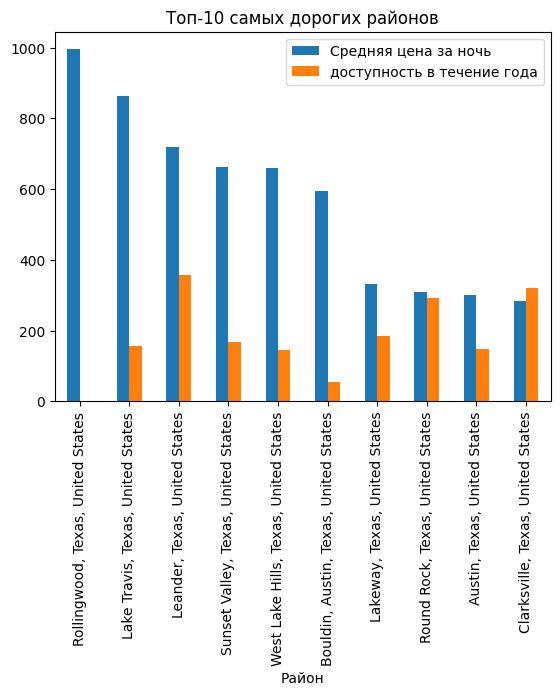

In [ ]:
plt.figure(figsize=(20,15))
data.rename(index=str, columns={"price": "Средняя цена за ночь", "availability_365": "доступность в течение года"}).head(10).plot(kind="bar")
plt.title("Топ-10 самых дорогих районов")
plt.xlabel('Район')
plt.show()

Как видно из данных полученных, самый дорогой район Rollingwood вообще не доступен для аренды жилья...

Однако видим, что доступность распределена довольно таки нормально. Нет какой-то тендеции возрастания доступности относительно убывания цены жилья

<Figure size 2000x1500 with 0 Axes>

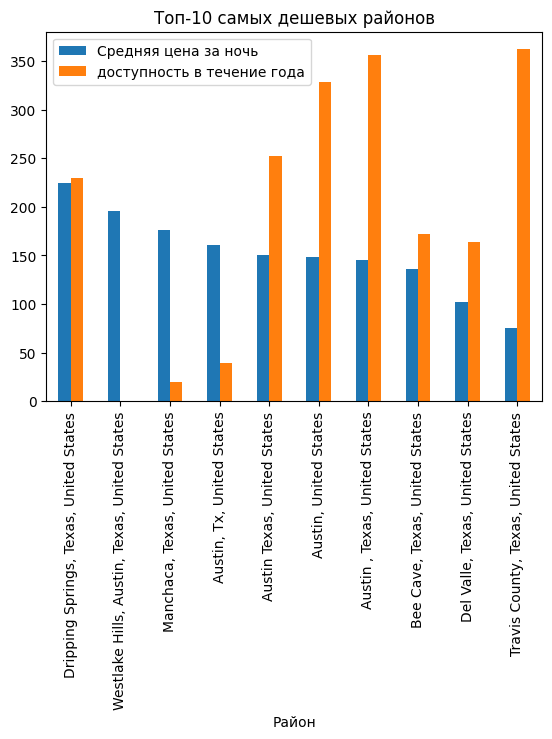

In [ ]:
plt.figure(figsize=(20,15))
data.rename(index=str, columns={"price": "Средняя цена за ночь", "availability_365": "доступность в течение года"}).tail(10).plot(kind="bar")
plt.title("Топ-10 самых дешевых районов")
plt.xlabel('Район')
plt.show()

Тут уже заметна, тенденция роста доступности жилья, по мере уменьшения средней стоимости аренды жилья

In [ ]:
data.tail(10)

,price,availability_365
neighbourhood,,
"Dripping Springs, Texas, United States",224.75,229.75
"Westlake Hills, Austin, Texas, United States",196.00,0.00
"Manchaca, Texas, United States",176.00,20.00
"Austin, Tx, United States",161.00,39.00
"Austin Texas, United States",150.00,252.00
"Austin, United States",148.00,328.00
"Austin , Texas, United States",145.00,356.00
"Bee Cave, Texas, United States",136.00,172.00
"Del Valle, Texas, United States",102.50,163.50


Интересно, что и среди дешевых районов есть свой район у которого доступность равна 0 - это Westlake Hills. Немного погуглив, оказалось понятно, почему в этом районе нет возможности снять жилье, ибо этот район славится своей природой: одной из уникальных особенностей Уэстлейк-Хиллз является его расположение в Техасской горной местности, что предоставляет жителям доступ к разнообразным видам активного отдыха, таким как пешие походы и езда на велосипеде. Кроме того, Уэстлейк-Хиллз является домом для некоторых из самых престижных школ Остина, что делает его популярным местом для семейного отдыха. Этот район также известен своими роскошными домами и высококлассными магазинами и ресторанами. В целом, Уэстлейк-Хиллз предлагает уникальное сочетание природной красоты, городских удобств и высокого уровня жизни.

**Критерии оценки:**

* Найдена интересная особенность в данных.
* Выполнены расчеты и предоставлены визуализации, подтверждающие найденную особенность.
* Предложено объяснение

## Бонус (0.1 балла):
Вставьте картинку, описывающую ваш опыт выполнения этого ДЗ:

#╰( ͡° ͜ʖ ͡° )つ──☆*:・ﾟ

![Tony Stark](https://www.meme-arsenal.com/memes/3fa9753e0f71247f5bda94b524494314.jpg)
